In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

# I. Recuperation des données

## A. Recuperation de l'ensemble des données sur un DataSet


In [2]:
#recuperation des fichiers

pd.set_option('display.max_columns', None)

def RecupDonnées(lst_fichiers):

    Data=pd.DataFrame()
    
    for elem in lst_fichiers:
        df=pd.read_csv(elem, sep="|")
        Data=pd.concat([Data,df],axis=0,join="outer",ignore_index=True)
    
    return Data

liste_fichiers=["valeursfoncieres-2016-s2.txt","valeursfoncieres-2017.txt","valeursfoncieres-2018.txt",
                "valeursfoncieres-2019.txt","valeursfoncieres-2020.txt","valeursfoncieres-2021-s1.txt"]

Data=RecupDonnées(liste_fichiers)


In [3]:
Data

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/07/2016,Vente,"29,77",NaN,NaN,NaN,B219,PASSANT,1570.00,FEILLENS,1,159,NaN,C,2236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,13.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01/07/2016,Vente,"227050,00",5523.00,NaN,NaN,B025,LA CULEE,1310.00,BUELLAS,1,65,NaN,A,1677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.00,Maison,NaN,12.00,0.00,S,NaN,700.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01/07/2016,Vente,"227050,00",5523.00,NaN,NaN,B025,LA CULEE,1310.00,BUELLAS,1,65,NaN,A,1677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.00,Maison,NaN,101.00,5.00,S,NaN,700.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,06/07/2016,Vente,"156500,00",1348.00,NaN,CHEM,0356,DU PETIT CORGENON,1310.00,BUELLAS,1,65,NaN,B,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.00,Maison,NaN,94.00,4.00,S,NaN,1013.00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/07/2016,Vente,"212000,00",340.00,NaN,CHE,0463,DES SOURCES,1160.00,SAINT-MARTIN-DU-MONT,1,374,NaN,G,1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.00,Maison,NaN,100.00,4.00,S,NaN,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16306434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/03/2021,Vente,"383000,00",8.00,NaN,RUE,9382,DES TOURNELLES,75004.00,PARIS 04,75,104,NaN,AO,117,NaN,14,"28,86",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.00,Appartement,NaN,30.00,2.00,NaN,NaN,NaN
16306435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17/03/2021,Vente,"260000,00",8.00,NaN,RUE,8561,SAINTE FOY,75002.00,PARIS 02,75,102,NaN,AP,128,NaN,304,NaN,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.00,Appartement,NaN,37.00,2.00,NaN,NaN,NaN
16306436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/03/2021,Vente,"38000,00",6.00,NaN,RUE,4398,DES GUILLEMITES,75004.00,PARIS 04,75,104,NaN,AH,68,NaN,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.00,Dépendance,NaN,0.00,0.00,NaN,NaN,NaN
16306437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/03/2021,Vente,"38000,00",30.00,NaN,RUE,7338,DU PETIT MUSC,75004.00,PARIS 04,75,104,NaN,AP,5,NaN,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.00,Dépendance,NaN,0.00,0.00,NaN,NaN,NaN


## B. Données IDF et suppression colonnes vides

**Nous avons un DataSet tres volumineux. Avant de commencer l'analyse des données nous allons commencer par réduire la taille des donées. Pour ce faire nous allons :**
* 1- Identifier les colonnes vides ou ayant un percentage de valeurs manquantes élevé
* 2- Supprimer ces colonnes

**De plus, nous avons décidé de restreindre notre étude à la zone géographique Ile-de-France (IDF).**  

### 1. Traitement des colonnes vides

In [4]:
# Analyse des colonnes vides
(Data.isna().sum()/Data.shape[0]).sort_values(ascending=True)


Nombre de lots               0.00
No plan                      0.00
Code commune                 0.00
Code departement             0.00
Commune                      0.00
No disposition               0.00
Date mutation                0.00
Nature mutation              0.00
Section                      0.00
Code voie                    0.01
Voie                         0.01
Code postal                  0.01
Valeur fonciere              0.01
Nature culture               0.32
Surface terrain              0.32
No voie                      0.41
Type de voie                 0.42
Type local                   0.45
Code type local              0.45
Nombre pieces principales    0.45
Surface reelle bati          0.45
1er lot                      0.69
Surface Carrez du 1er lot    0.92
2eme lot                     0.93
Nature culture speciale      0.96
Prefixe de section           0.96
B/T/Q                        0.96
Surface Carrez du 2eme lot   0.98
3eme lot                     0.99
4eme lot      

* Nous allons supprimer toutes les colonnes à partir de la colonne "1er lot" car le taux de valeurs manquantes est trop élevé (> 0.69)

In [5]:
# On garde seulement les colonnes dont le taux de valeurs manquantes est inférieur à 0,68 
Data=Data[Data.columns[(Data.isna().sum()/Data.shape[0])<0.68]]


In [6]:
Data

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,05/07/2016,Vente,"29,77",NaN,NaN,B219,PASSANT,1570.00,FEILLENS,1,159,C,2236,0,NaN,NaN,NaN,NaN,S,13.00
1,1,01/07/2016,Vente,"227050,00",5523.00,NaN,B025,LA CULEE,1310.00,BUELLAS,1,65,A,1677,0,1.00,Maison,12.00,0.00,S,700.00
2,1,01/07/2016,Vente,"227050,00",5523.00,NaN,B025,LA CULEE,1310.00,BUELLAS,1,65,A,1677,0,1.00,Maison,101.00,5.00,S,700.00
3,2,06/07/2016,Vente,"156500,00",1348.00,CHEM,0356,DU PETIT CORGENON,1310.00,BUELLAS,1,65,B,1711,0,1.00,Maison,94.00,4.00,S,1013.00
4,1,06/07/2016,Vente,"212000,00",340.00,CHE,0463,DES SOURCES,1160.00,SAINT-MARTIN-DU-MONT,1,374,G,1832,0,1.00,Maison,100.00,4.00,S,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16306434,1,12/03/2021,Vente,"383000,00",8.00,RUE,9382,DES TOURNELLES,75004.00,PARIS 04,75,104,AO,117,2,2.00,Appartement,30.00,2.00,NaN,NaN
16306435,1,17/03/2021,Vente,"260000,00",8.00,RUE,8561,SAINTE FOY,75002.00,PARIS 02,75,102,AP,128,2,2.00,Appartement,37.00,2.00,NaN,NaN
16306436,1,19/03/2021,Vente,"38000,00",6.00,RUE,4398,DES GUILLEMITES,75004.00,PARIS 04,75,104,AH,68,1,3.00,Dépendance,0.00,0.00,NaN,NaN
16306437,1,30/03/2021,Vente,"38000,00",30.00,RUE,7338,DU PETIT MUSC,75004.00,PARIS 04,75,104,AP,5,1,3.00,Dépendance,0.00,0.00,NaN,NaN


### 2. Création du Dataset Ile-de-France

In [7]:
# Conversion en string des valeurs de la colonne "Code departement"
Data['Code departement']=Data['Code departement'].apply(lambda x:str(x)) 

In [8]:
# Création du dataset Ile-de-France
lst_IDF=['75','78','93','91','92','95','77','94']
Data=Data[Data['Code departement'].isin(lst_IDF)]

In [9]:
Data

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
1207062,1,01/07/2016,Vente,"293000,00",32.00,RUE,0160,D ETRELLES,77930.00,SAINT-SAUVEUR-SUR-ECOLE,77,435,C,604,0,1.00,Maison,136.00,6.00,S,416.00
1207063,1,04/07/2016,Vente,"189000,00",NaN,NaN,B013,LA HAYE SAINT GERMAIN,77176.00,SAVIGNY-LE-TEMPLE,77,445,ZH,1918,0,NaN,NaN,NaN,NaN,AB,17.00
1207064,1,04/07/2016,Vente,"189000,00",112.00,MAIL,0071,DE LA FONTAINE RONDE,77176.00,SAVIGNY-LE-TEMPLE,77,445,ZH,1919,0,1.00,Maison,67.00,3.00,S,94.00
1207065,1,05/07/2016,Vente,"119000,00",34.00,AV,0866,DE LA PIERRERIE,77680.00,ROISSY-EN-BRIE,77,390,AI,28,1,3.00,Dépendance,0.00,0.00,NaN,NaN
1207066,1,05/07/2016,Vente,"119000,00",34.00,AV,0866,DE LA PIERRERIE,77680.00,ROISSY-EN-BRIE,77,390,AI,28,1,2.00,Appartement,55.00,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16306434,1,12/03/2021,Vente,"383000,00",8.00,RUE,9382,DES TOURNELLES,75004.00,PARIS 04,75,104,AO,117,2,2.00,Appartement,30.00,2.00,NaN,NaN
16306435,1,17/03/2021,Vente,"260000,00",8.00,RUE,8561,SAINTE FOY,75002.00,PARIS 02,75,102,AP,128,2,2.00,Appartement,37.00,2.00,NaN,NaN
16306436,1,19/03/2021,Vente,"38000,00",6.00,RUE,4398,DES GUILLEMITES,75004.00,PARIS 04,75,104,AH,68,1,3.00,Dépendance,0.00,0.00,NaN,NaN
16306437,1,30/03/2021,Vente,"38000,00",30.00,RUE,7338,DU PETIT MUSC,75004.00,PARIS 04,75,104,AP,5,1,3.00,Dépendance,0.00,0.00,NaN,NaN


In [10]:
#Creation d'un csv pour pas avoir à tout relancer à cahque fois
Data.to_csv('Data_IDF.csv')

# II. Analyse des données

**L'objectif de cette partie est de mener une analyse exploratoire de donées afin identifier des éventuels problemes dans nos donées (valeurs extremes, incohérences, etc...) et les traiter par la suite. Cette etape est indispensable pour la bonne construction d'un modèle de prédiction de la valeur foncière.**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Récuperation des donées csv Ile-de-France
Data=pd.read_csv('Data_IDF.csv',index_col=False)
Data=Data.drop(["Unnamed: 0"],axis=1)
pd.set_option('display.max_columns', None)

In [13]:
Data

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,01/07/2016,Vente,"293000,00",32.00,RUE,0160,D ETRELLES,77930.00,SAINT-SAUVEUR-SUR-ECOLE,77,435,C,604,0,1.00,Maison,136.00,6.00,S,416.00
1,1,04/07/2016,Vente,"189000,00",NaN,NaN,B013,LA HAYE SAINT GERMAIN,77176.00,SAVIGNY-LE-TEMPLE,77,445,ZH,1918,0,NaN,NaN,NaN,NaN,AB,17.00
2,1,04/07/2016,Vente,"189000,00",112.00,MAIL,0071,DE LA FONTAINE RONDE,77176.00,SAVIGNY-LE-TEMPLE,77,445,ZH,1919,0,1.00,Maison,67.00,3.00,S,94.00
3,1,05/07/2016,Vente,"119000,00",34.00,AV,0866,DE LA PIERRERIE,77680.00,ROISSY-EN-BRIE,77,390,AI,28,1,3.00,Dépendance,0.00,0.00,NaN,NaN
4,1,05/07/2016,Vente,"119000,00",34.00,AV,0866,DE LA PIERRERIE,77680.00,ROISSY-EN-BRIE,77,390,AI,28,1,2.00,Appartement,55.00,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260812,1,12/03/2021,Vente,"383000,00",8.00,RUE,9382,DES TOURNELLES,75004.00,PARIS 04,75,104,AO,117,2,2.00,Appartement,30.00,2.00,NaN,NaN
2260813,1,17/03/2021,Vente,"260000,00",8.00,RUE,8561,SAINTE FOY,75002.00,PARIS 02,75,102,AP,128,2,2.00,Appartement,37.00,2.00,NaN,NaN
2260814,1,19/03/2021,Vente,"38000,00",6.00,RUE,4398,DES GUILLEMITES,75004.00,PARIS 04,75,104,AH,68,1,3.00,Dépendance,0.00,0.00,NaN,NaN
2260815,1,30/03/2021,Vente,"38000,00",30.00,RUE,7338,DU PETIT MUSC,75004.00,PARIS 04,75,104,AP,5,1,3.00,Dépendance,0.00,0.00,NaN,NaN


## A. Analyse de forme 

In [14]:
# Dimensions du Dataset
Data.shape

(2260817, 21)

In [15]:
# Type des colonnes
print(Data.dtypes.value_counts())

print("------------------------------------")
Data.dtypes

object     10
float64     6
int64       5
dtype: int64
------------------------------------


No disposition                 int64
Date mutation                 object
Nature mutation               object
Valeur fonciere               object
No voie                      float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement               int64
Code commune                   int64
Section                       object
No plan                        int64
Nombre de lots                 int64
Code type local              float64
Type local                    object
Surface reelle bati          float64
Nombre pieces principales    float64
Nature culture                object
Surface terrain              float64
dtype: object

<AxesSubplot:ylabel='None'>

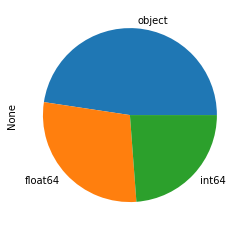

In [16]:
# Répartition du type des variables
Data.dtypes.value_counts().plot.pie()

**Nous remarquons que certaines colonnes ne sont pas du bon type. Nous décidons donc de changer uniquement le type de colonnes que nous jugeons pertinentes pour la contruction du modèle :**
* Date Mutation -> doit etre convertie en datetime
* Valeur fonciere -> doit etre convertie en float

In [17]:
#Conversion

#Nous devons d'abord convertir en string puis en float car le passage direct de type object à float ne fonctionne pas
Data['Valeur fonciere']=Data['Valeur fonciere'].apply(lambda x:str(x))
Data['Valeur fonciere']=Data['Valeur fonciere'].apply(lambda x:float(x.replace(",",".")))

# Pour la colonne "Date mutation", nous avons converti en type datetime et gardé que l'année
Data['Date mutation']=Data['Date mutation'].apply(lambda x:str(x))
Data['Date mutation'] = pd.to_datetime(Data['Date mutation'], format="%d/%m/%Y")
Data['Date mutation']=Data['Date mutation'].dt.year

In [18]:
print(Data.dtypes.value_counts())
print("------------------------------------")
print(Data.dtypes)

object     8
float64    7
int64      6
dtype: int64
------------------------------------
No disposition                 int64
Date mutation                  int64
Nature mutation               object
Valeur fonciere              float64
No voie                      float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement               int64
Code commune                   int64
Section                       object
No plan                        int64
Nombre de lots                 int64
Code type local              float64
Type local                    object
Surface reelle bati          float64
Nombre pieces principales    float64
Nature culture                object
Surface terrain              float64
dtype: object


<AxesSubplot:>

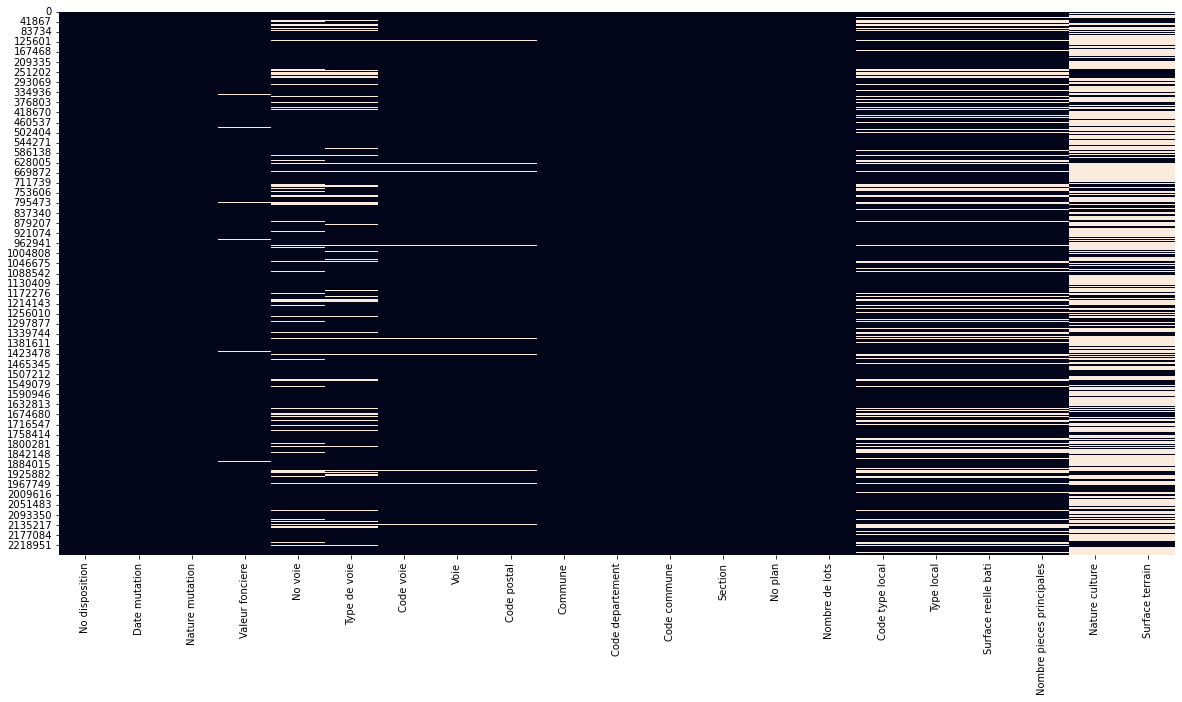

In [19]:
#Identification des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(Data.isna(), cbar=False)

In [20]:
# Identification des colonnes vides
(Data.isna().sum()/Data.shape[0]).sort_values(ascending=True)

No disposition              0.00
Nombre de lots              0.00
No plan                     0.00
Section                     0.00
Code commune                0.00
Commune                     0.00
Code departement            0.00
Nature mutation             0.00
Date mutation               0.00
Valeur fonciere             0.01
Code voie                   0.02
Voie                        0.02
Code postal                 0.02
Type de voie                0.11
No voie                     0.15
Code type local             0.22
Type local                  0.22
Surface reelle bati         0.22
Nombre pieces principales   0.22
Nature culture              0.65
Surface terrain             0.65
dtype: float64

**Nous remarquons que notre Target (la valeur foncière) presente 0.01% de valeurs manquantes. Nous constatons également que il y d'autres colonnes ayant des valeurs manquantes. Le traitement de ces colonnes est l'objet d'une partie suivante.**     

## B. Analyse de Fond

### 1-Visualisation de la Target : Valeur foncière

* Nous allons commencer par retirer les valaurs manquantes de la variable target

In [21]:
Data.dropna(subset=['Valeur fonciere'],inplace=True)
print(Data['Valeur fonciere'].isna().sum())

0


***Valeur Foncière : statistique de base***

In [22]:
Data['Valeur fonciere'].describe()

count      2236898.00
mean       3517584.38
std       21057128.33
min              0.10
25%         172000.00
50%         283100.00
75%         587000.00
max     1256965630.00
Name: Valeur fonciere, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1945c39e2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1945c39e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1945eb8ef70>],
 'medians': [<matplotlib.lines.Line2D at 0x1945c3a00a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1945c3a0430>],
 'means': []}

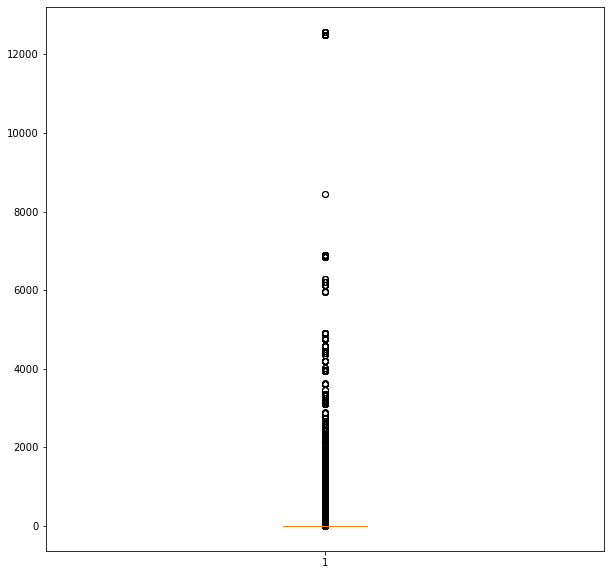

In [23]:
#Etant donné la taille des chiffres nous allons mettre en centaine de milliers d'euros afin d'obtenir un boxplot plus lisible
DataTarget=Data['Valeur fonciere'].apply(lambda x:x/100000)
plt.figure(figsize=(10,10))
plt.boxplot(DataTarget)

**Analyse BoxPlot**

Nous remarquons la presence des valeurs extremes assez importantes. Les données sont très concentrés et la mediane est ecrasé vers le bas. Nous allons donc supprimer ces valeurs extremes par la suite. Certains outliers sont surement dues a des erreurs : nous remarquons qu il existe des prix superieurs à 1 milliards et d'autres superieurs a 100 milions qui ne pretent pas à a réalité du marché immobilier. Ces derniers representent une infime partie de l'échantillon et ne sont pas tres utiles à l'analyse

In [24]:
Data[Data['Valeur fonciere']<10000]

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
35,1,2016,Vente,384.00,37.00,RUE,0220,CAMILLE FLAMMARION,77000.00,MELUN,77,288,AR,689,0,NaN,NaN,NaN,NaN,AB,64.00
77,1,2016,Vente en l'état futur d'achèvement,7000.00,9.00,RUE,0130,DE COSSIGNY,77170.00,BRIE COMTE ROBERT,77,53,AO,212,1,NaN,NaN,NaN,NaN,NaN,NaN
97,1,2016,Vente,8000.00,6.00,AV,1100,DES ROSES,77340.00,PONTAULT COMBAULT,77,373,AK,49,1,3.00,Dépendance,0.00,0.00,NaN,NaN
175,1,2016,Echange,4000.00,NaN,NaN,B050,LES MOCQUE PANIERS,77930.00,PERTHES,77,359,F,423,0,NaN,NaN,NaN,NaN,BT,1283.00
176,1,2016,Echange,4000.00,NaN,NaN,B030,LES FRECULS,77930.00,PERTHES,77,359,G,659,0,NaN,NaN,NaN,NaN,BT,56.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260515,2,2021,Echange,700.00,10.00,RUE,8723,SAINT PAUL,75004.00,PARIS 04,75,104,AQ,99,1,2.00,Appartement,65.00,3.00,NaN,NaN
2260550,1,2021,Vente,2000.00,9.00,RUE,0523,AUBRIOT,75004.00,PARIS 04,75,104,AH,49,1,2.00,Appartement,28.00,1.00,NaN,NaN
2260780,1,2021,Vente,500.00,25.00,BD,1097,DE BONNE NOUVELLE,75002.00,PARIS 02,75,102,AO,14,1,3.00,Dépendance,0.00,0.00,NaN,NaN
2260798,1,2021,Vente,100.00,22.00,RUE,5738,DES LOMBARDS,75004.00,PARIS 04,75,104,AC,108,1,2.00,Appartement,18.00,1.00,NaN,NaN


* Nous remarquons la presence de valeurs incoherentes => par exemple vente d'un appart à Paris à seulement 100 euros ( ligne 2260798)
* Plus presence de doublons ( lignes 2260799 et 2260798) 

***Suppression des doublons***

In [25]:
Data.drop_duplicates(keep = 'first', inplace=True)

***Elimination des outliers et des valeurs incohérentes***

* Elimination des valeurs extremes inférieures et supérieures

In [26]:
#Valeurs Maximales abherantes
q75,q25 = np.percentile(Data['Valeur fonciere'],[75,25])
intr_qr = q75-q25

maxi = q75+(1.5*intr_qr)

Data=Data[Data['Valeur fonciere']<maxi]
# nous supprimons toutes les valeurs foncières inférieures à 5000 car pas conforme avec la réalité du marché de l'immobilier
Data=Data[Data['Valeur fonciere']>5000]

* Suppression des valeurs foncières des maisons et appart inférieures à 30 000 car pas conforme avec la réalité du marché de l'immobilier

In [27]:
Data.drop( Data[ (Data['Code type local'] <3) & (Data['Valeur fonciere'] < 30000) ].index, inplace=True)

***Distribution de la valeur foncière***

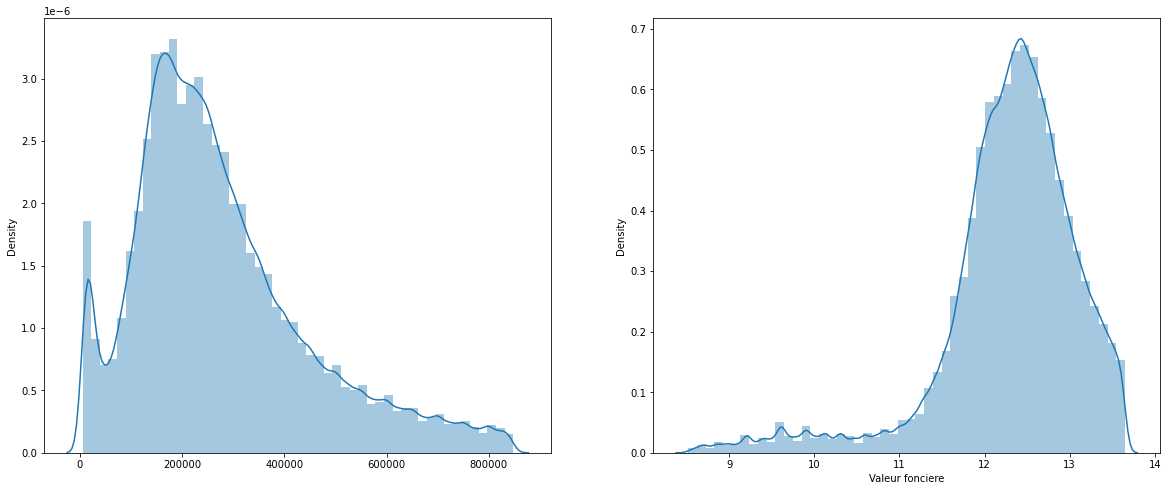

In [28]:
fig, ax = plt.subplots(1,2,figsize= (20,8));
sns.distplot(Data['Valeur fonciere'].values, color = 'tab:blue', ax= ax[0]);
sns.distplot(np.log(Data['Valeur fonciere']), color = 'tab:blue', ax= ax[1]);

* Modification des doublons impliquant nature du sol differents (voir pdf explicatif)

In [29]:
#Nous commenceons par retirer la colonne nature culture puis on retire les doublons
Data2=Data.drop('Nature culture',axis=1)
Data2.drop_duplicates(keep = 'first', inplace=True)

#Nous faisons une jointure sur les data, afin d'obtenir un dataset sans doublons
Data=pd.merge(Data2,Data['Nature culture'],how='left',left_index=True,right_index=True)

In [30]:
Data

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture
0,1,2016,Vente,293000.00,32.00,RUE,0160,D ETRELLES,77930.00,SAINT-SAUVEUR-SUR-ECOLE,77,435,C,604,0,1.00,Maison,136.00,6.00,416.00,S
1,1,2016,Vente,189000.00,NaN,NaN,B013,LA HAYE SAINT GERMAIN,77176.00,SAVIGNY-LE-TEMPLE,77,445,ZH,1918,0,NaN,NaN,NaN,NaN,17.00,AB
2,1,2016,Vente,189000.00,112.00,MAIL,0071,DE LA FONTAINE RONDE,77176.00,SAVIGNY-LE-TEMPLE,77,445,ZH,1919,0,1.00,Maison,67.00,3.00,94.00,S
3,1,2016,Vente,119000.00,34.00,AV,0866,DE LA PIERRERIE,77680.00,ROISSY-EN-BRIE,77,390,AI,28,1,3.00,Dépendance,0.00,0.00,NaN,NaN
4,1,2016,Vente,119000.00,34.00,AV,0866,DE LA PIERRERIE,77680.00,ROISSY-EN-BRIE,77,390,AI,28,1,2.00,Appartement,55.00,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260812,1,2021,Vente,383000.00,8.00,RUE,9382,DES TOURNELLES,75004.00,PARIS 04,75,104,AO,117,2,2.00,Appartement,30.00,2.00,NaN,NaN
2260813,1,2021,Vente,260000.00,8.00,RUE,8561,SAINTE FOY,75002.00,PARIS 02,75,102,AP,128,2,2.00,Appartement,37.00,2.00,NaN,NaN
2260814,1,2021,Vente,38000.00,6.00,RUE,4398,DES GUILLEMITES,75004.00,PARIS 04,75,104,AH,68,1,3.00,Dépendance,0.00,0.00,NaN,NaN
2260815,1,2021,Vente,38000.00,30.00,RUE,7338,DU PETIT MUSC,75004.00,PARIS 04,75,104,AP,5,1,3.00,Dépendance,0.00,0.00,NaN,NaN


### 2- Analyse des différentes variables

Apres avoir analysé le sens et les données des différentes variables, à partir de nos conaissances et de recherches sur le net, on s'apercoit que certaines n'ont pas vraiment de lien avec la valeur foncière.De plus d'autres variables sont redondantes, comme par exemple "Code Commune" et "Commune". Ces variables ne seront pas analysées dans cette partie. Elles feront l'objet d'un traitement dans la partie pre-processing.

* **Analyse distribution des variables qualitatives et quantitavies discretes**

In [31]:
#Nous commencons par retirer la variable target
pd.set_option('display.max_columns', None)
DataFacteurs=Data.drop('Valeur fonciere',axis=1)

In [32]:
DataFacteurs.describe()

,No disposition,Date mutation,No voie,Code postal,Code departement,Code commune,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,1532041.00,1532041.00,1324620.00,1513206.00,1532041.00,1532041.00,1532041.00,1532041.00,1249437.00,1248952.00,1248952.00,485021.00
mean,1.05,2018.46,280.30,86082.68,85.82,200.63,296.70,0.93,2.15,53.50,2.12,1068.36
std,1.66,1.47,1416.81,8226.23,8.18,191.10,437.32,0.89,0.80,172.42,1.93,6214.53
min,1.00,2016.00,1.00,75001.00,75.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00
25%,1.00,2017.00,8.00,77450.00,77.00,52.00,58.00,0.00,2.00,0.00,0.00,169.00
50%,1.00,2018.00,20.00,91330.00,91.00,115.00,154.00,1.00,2.00,45.00,2.00,360.00
75%,1.00,2020.00,52.00,93340.00,93.00,327.00,360.00,1.00,3.00,75.00,3.00,575.00
max,184.00,2021.00,9999.00,95880.00,95.00,692.00,6063.00,198.00,4.00,57470.00,112.00,611662.00


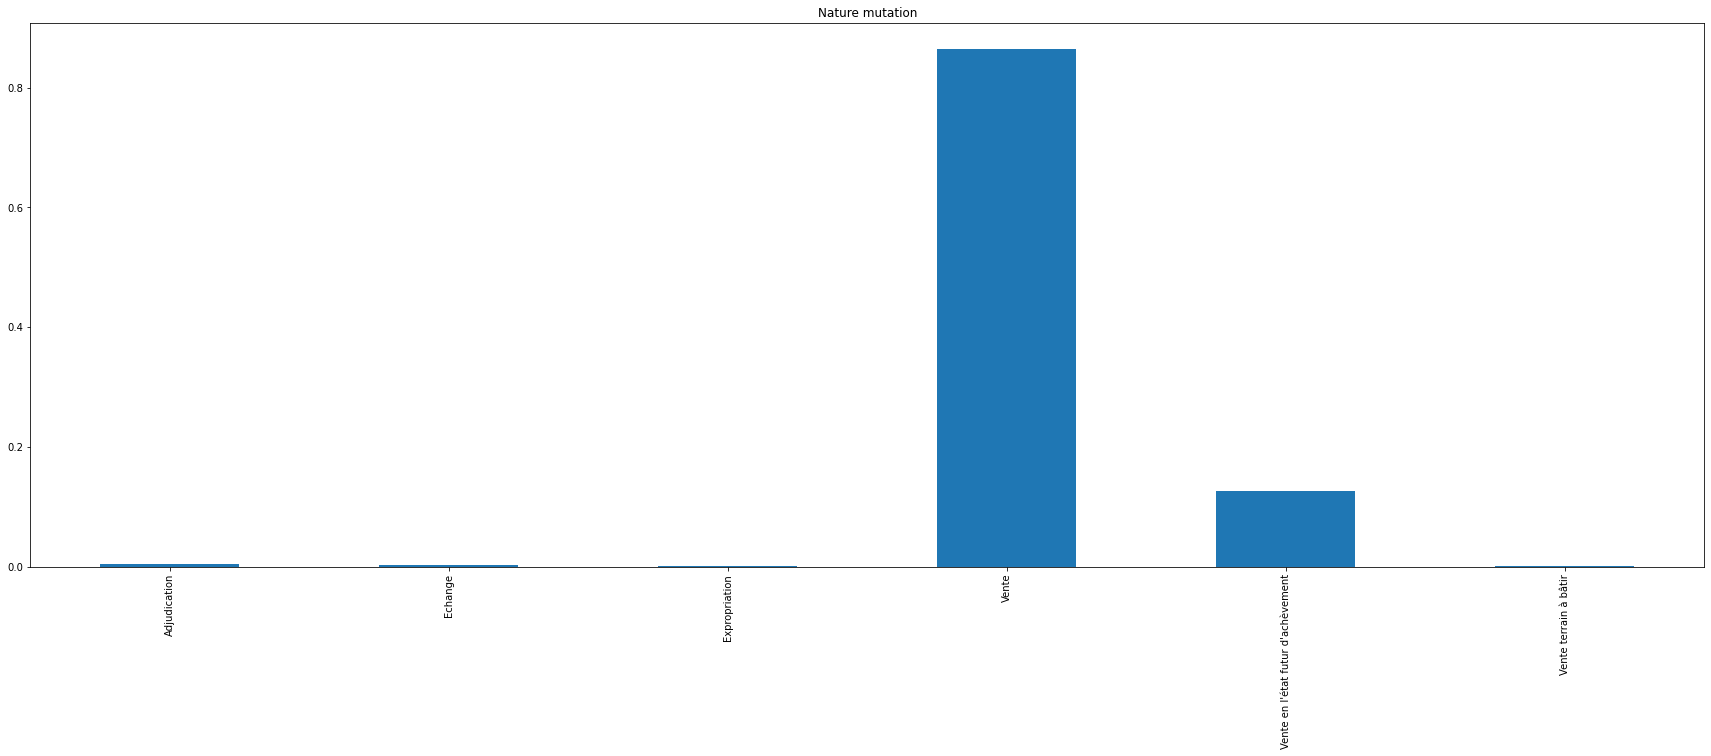

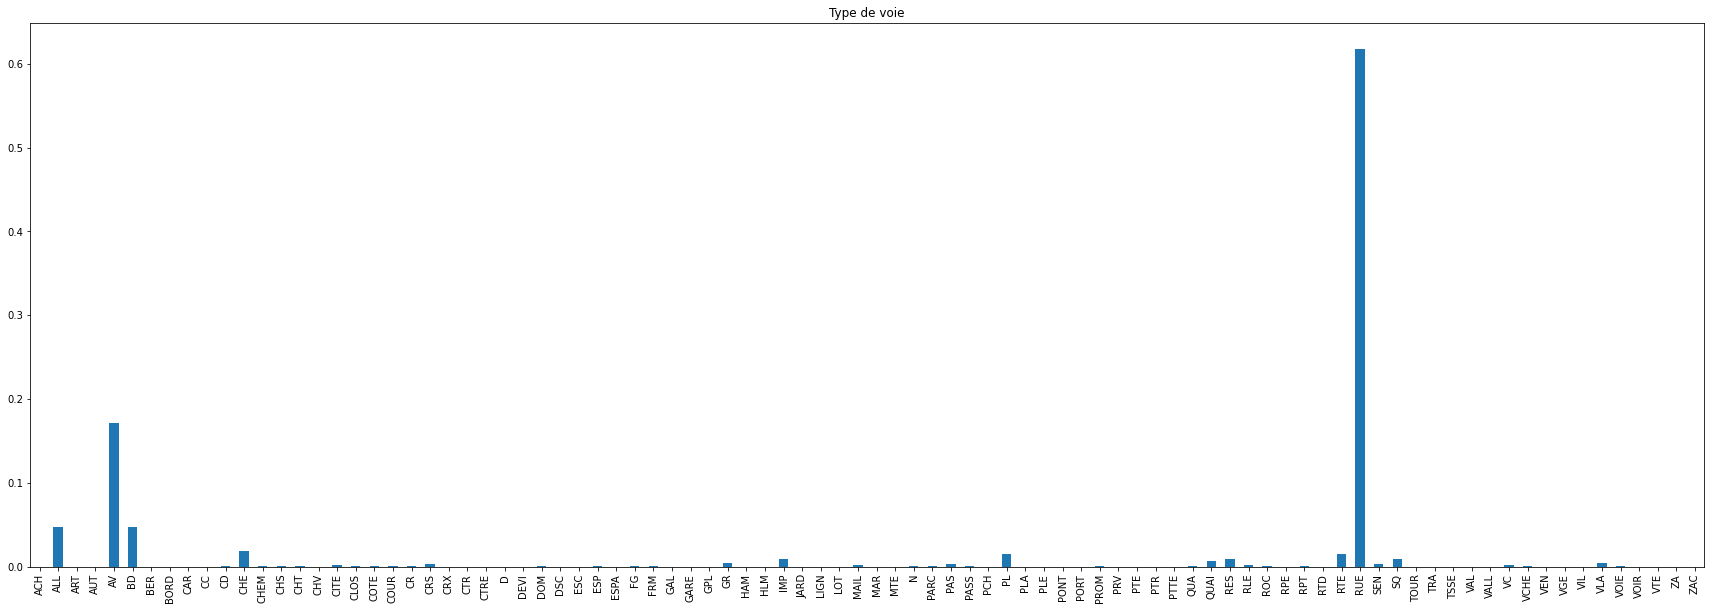

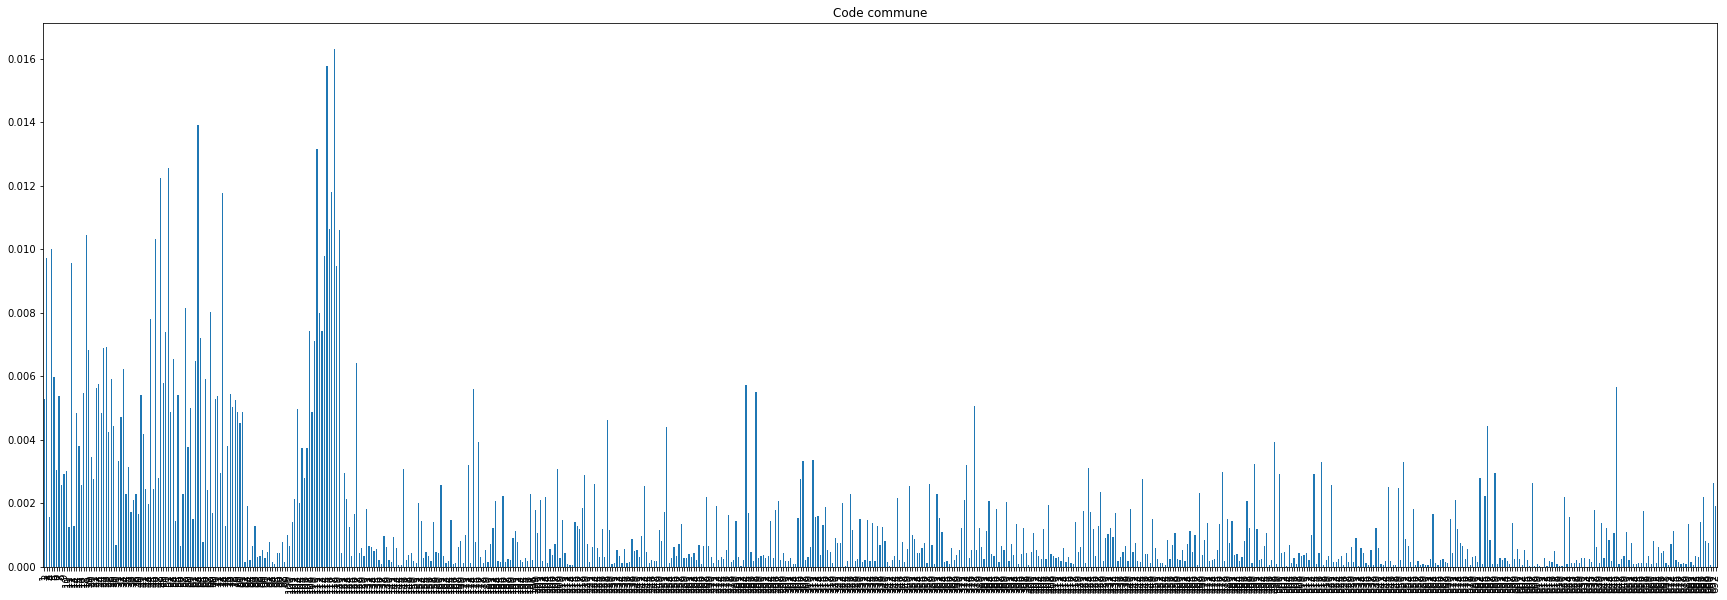

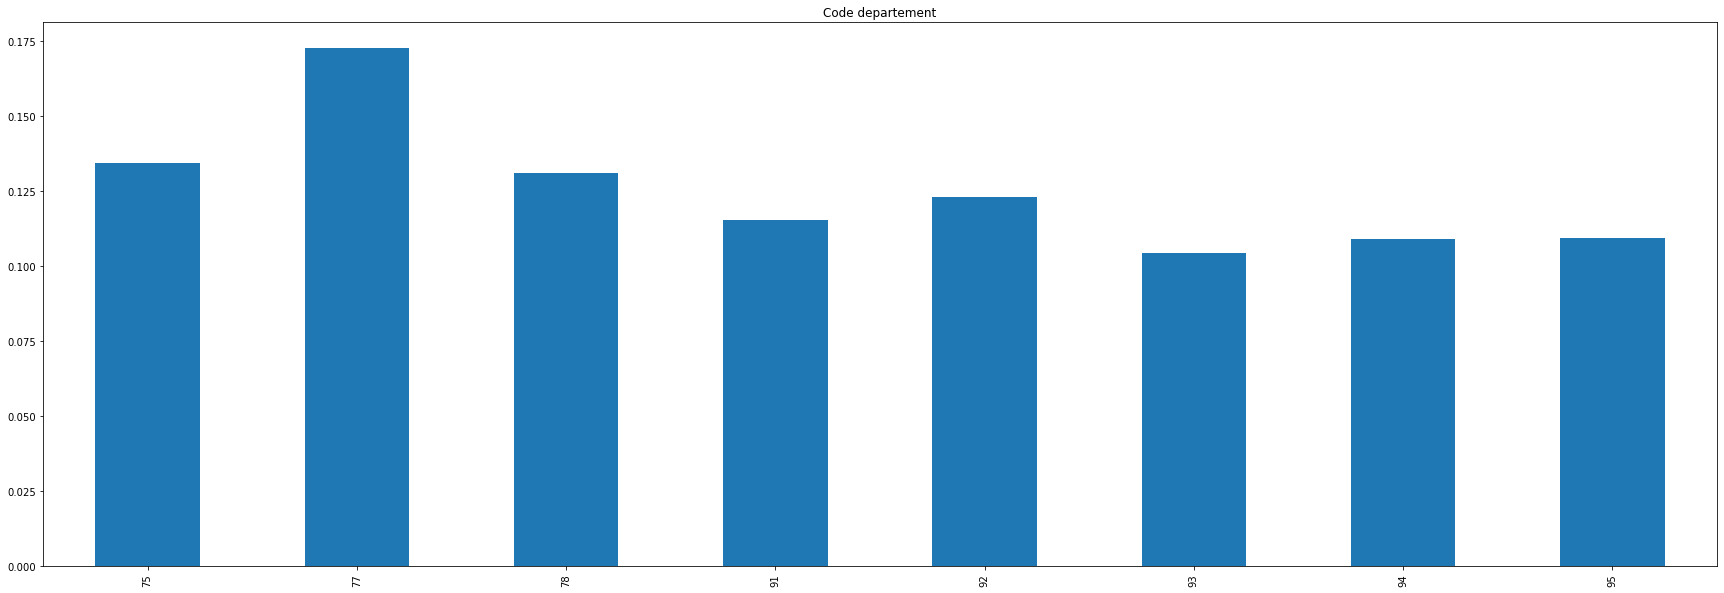

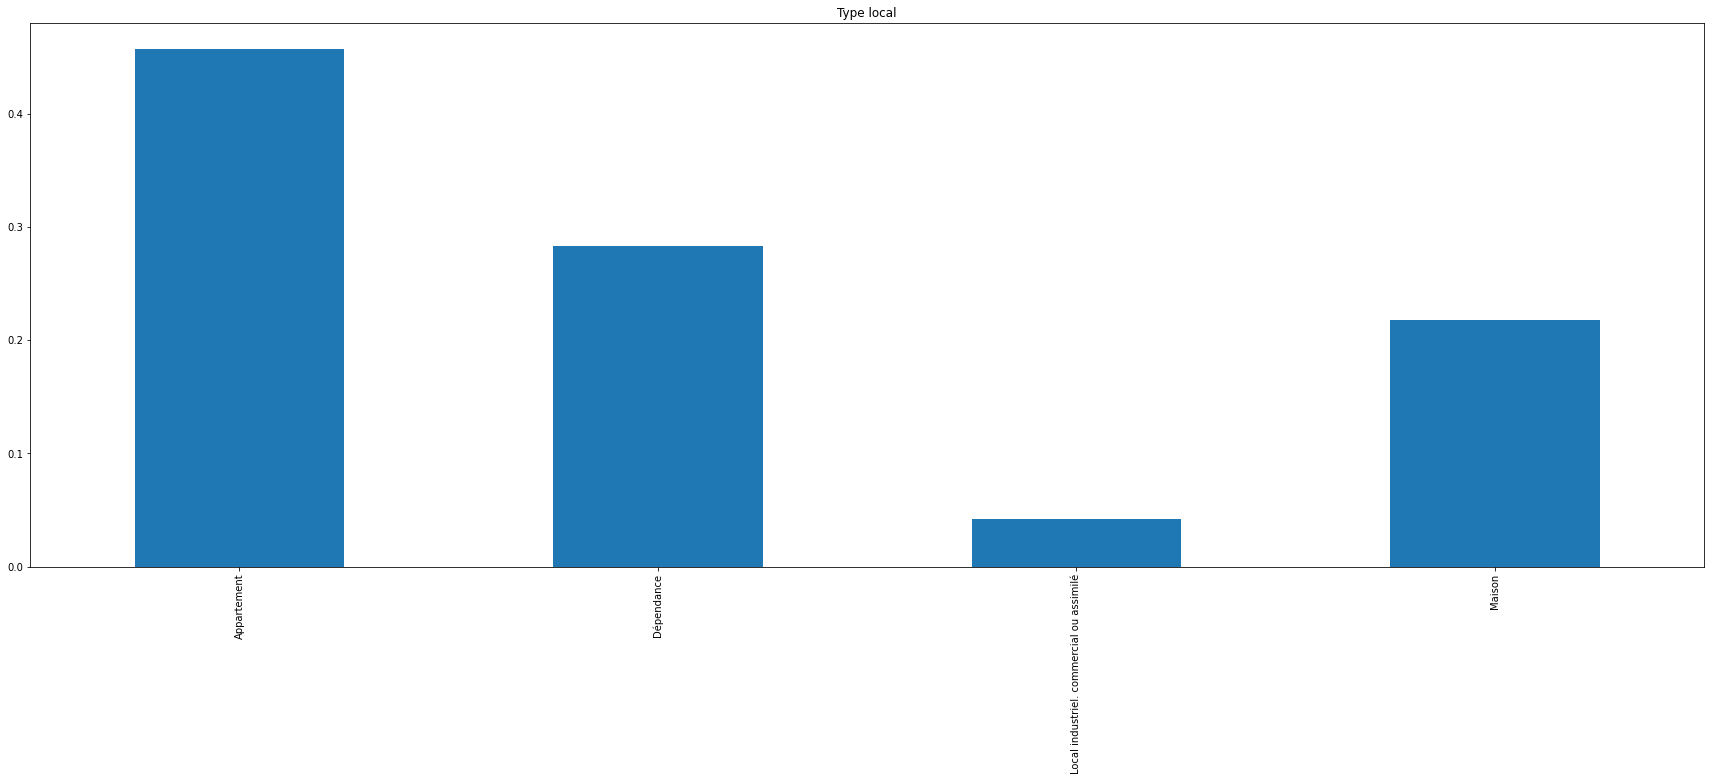

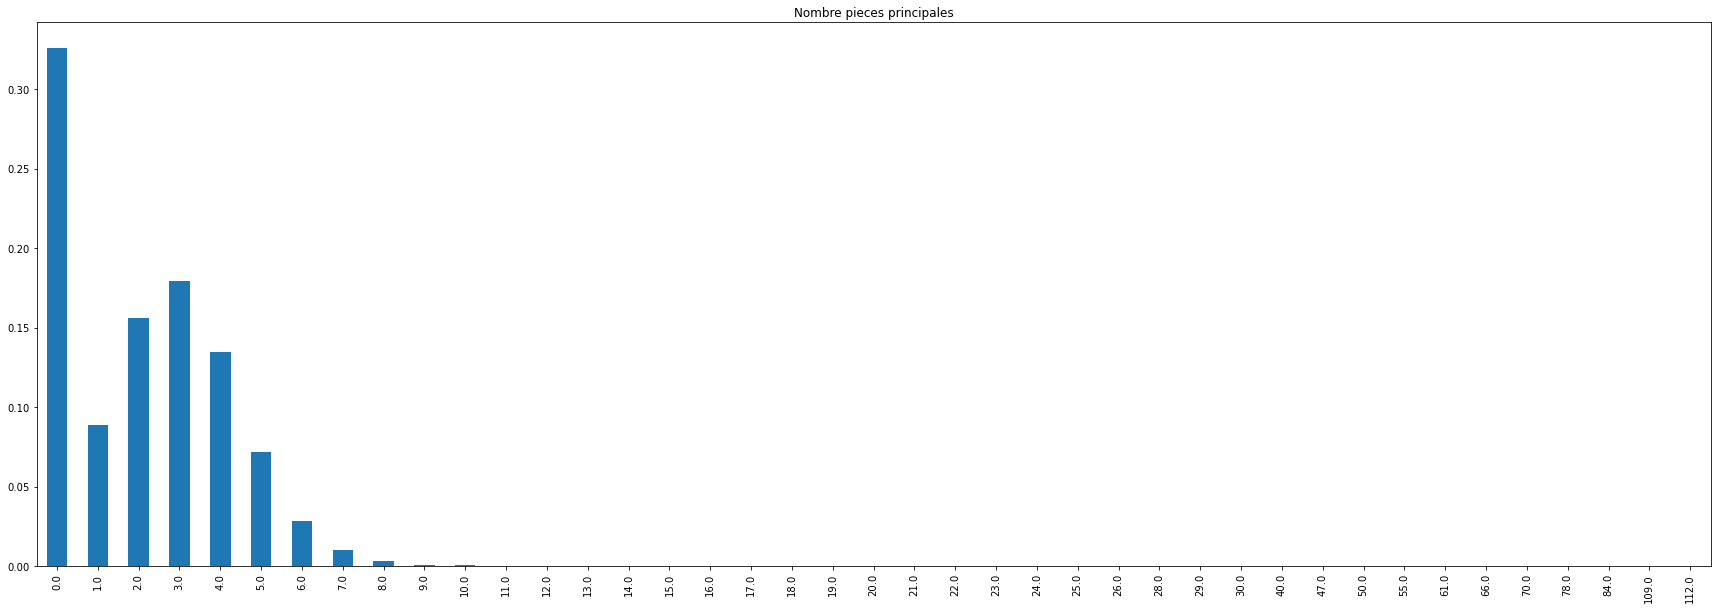

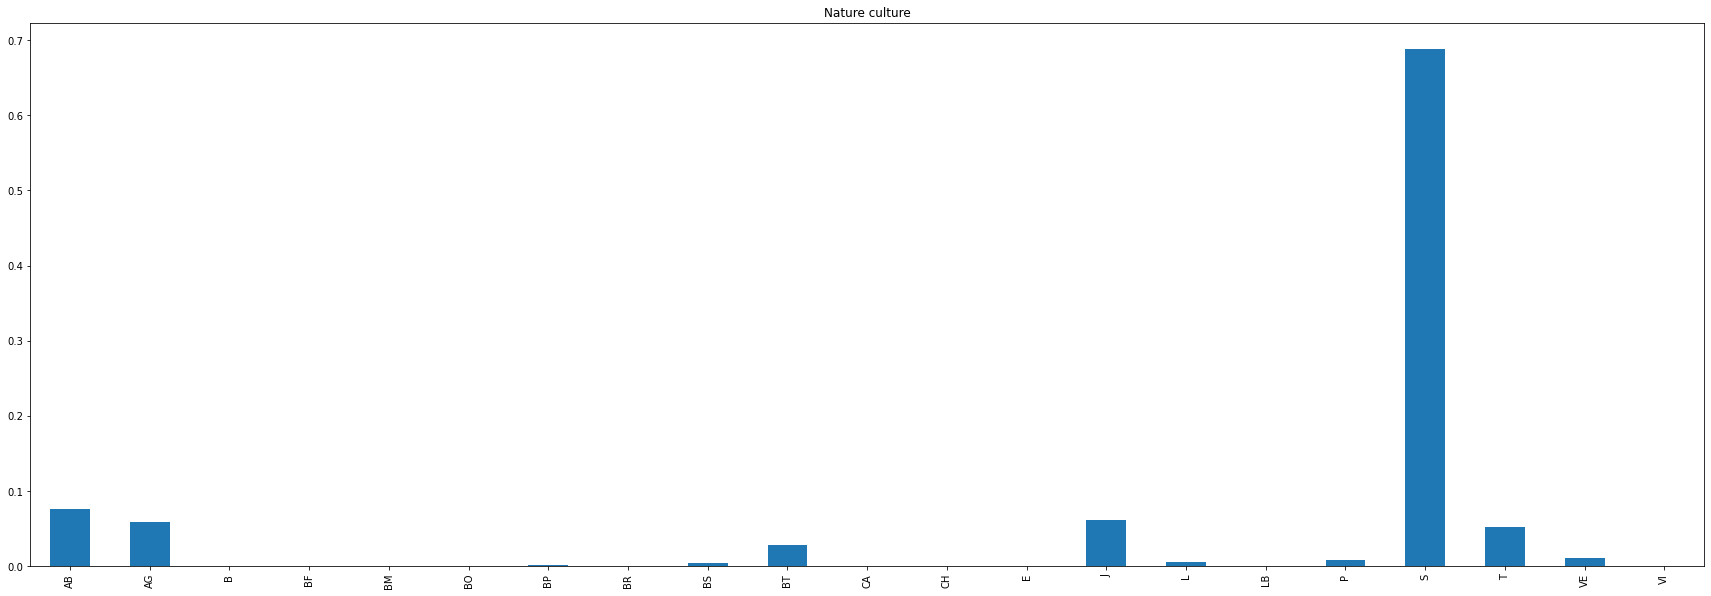

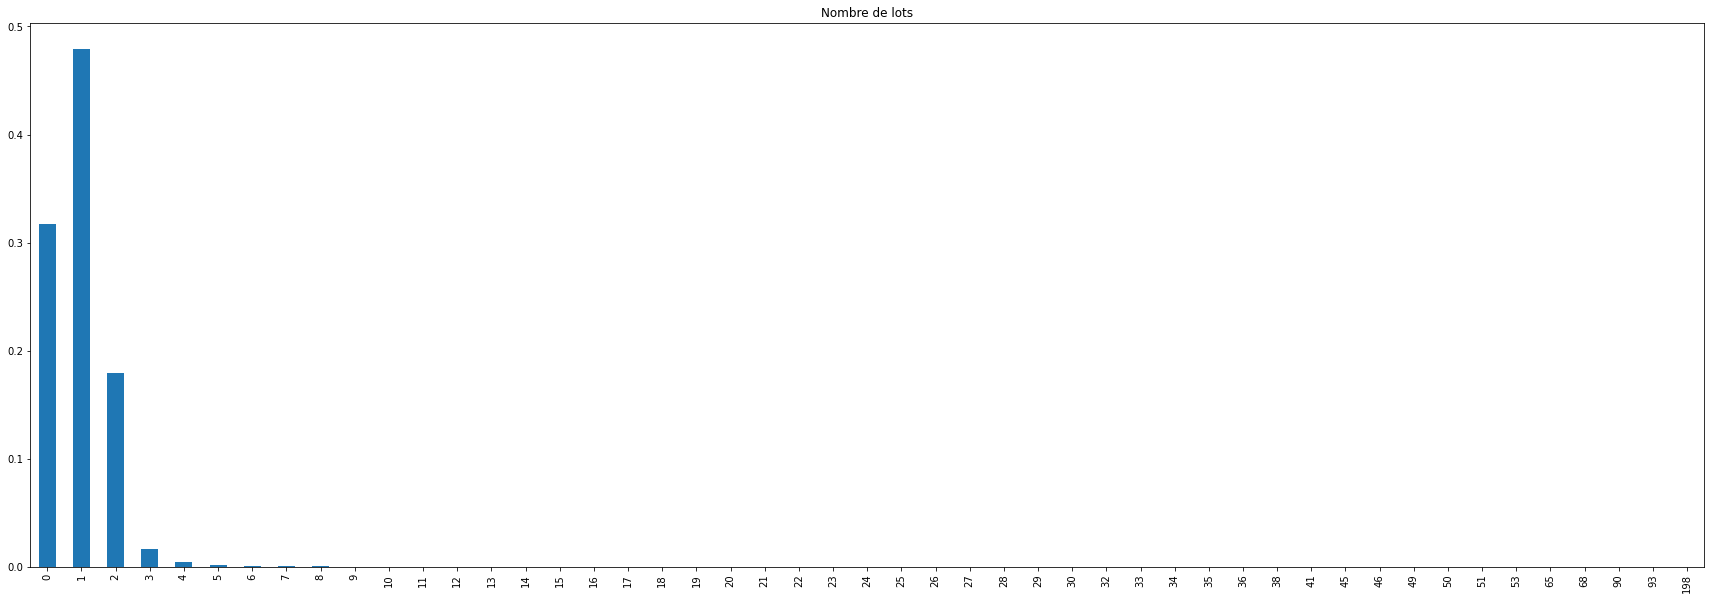

In [33]:
pd.set_option('display.max_columns', None)

#on stocke dans une liste les variables que nous lons étudier
lst=['Nature mutation','Type de voie','Code commune' ,'Code departement','Type local','Nombre pieces principales','Nature culture','Nombre de lots']

for col in lst:
        plt.figure(figsize=(30,10))
        (Data[col].value_counts()/Data[col].count()).sort_index().plot.bar(x='Targe',y='hfh')
        plt.title(col)

* Suppression des variables inutiles

In [34]:
Data=Data.drop(['No disposition','No voie','Code voie','Voie','Code postal','Code commune','Section','No plan','Type local'],axis=1)
Data

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture
0,2016,Vente,293000.00,RUE,SAINT-SAUVEUR-SUR-ECOLE,77,0,1.00,136.00,6.00,416.00,S
1,2016,Vente,189000.00,NaN,SAVIGNY-LE-TEMPLE,77,0,NaN,NaN,NaN,17.00,AB
2,2016,Vente,189000.00,MAIL,SAVIGNY-LE-TEMPLE,77,0,1.00,67.00,3.00,94.00,S
3,2016,Vente,119000.00,AV,ROISSY-EN-BRIE,77,1,3.00,0.00,0.00,NaN,NaN
4,2016,Vente,119000.00,AV,ROISSY-EN-BRIE,77,1,2.00,55.00,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2260812,2021,Vente,383000.00,RUE,PARIS 04,75,2,2.00,30.00,2.00,NaN,NaN
2260813,2021,Vente,260000.00,RUE,PARIS 02,75,2,2.00,37.00,2.00,NaN,NaN
2260814,2021,Vente,38000.00,RUE,PARIS 04,75,1,3.00,0.00,0.00,NaN,NaN
2260815,2021,Vente,38000.00,RUE,PARIS 04,75,1,3.00,0.00,0.00,NaN,NaN


#### Identification des valeurs incoherentes 

##### Nb pièces

In [35]:
Data[(Data['Code type local']==1) | (Data['Code type local']==2)][Data['Nombre pieces principales']==0] 

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture
10,2016,Vente,345000.00,RUE,LESIGNY,77,1,2.00,81.00,0.00,NaN,NaN
11,2016,Vente,345000.00,RUE,LESIGNY,77,1,2.00,24.00,0.00,NaN,NaN
13,2016,Vente,345000.00,RUE,LESIGNY,77,2,2.00,30.00,0.00,NaN,NaN
14,2016,Vente,345000.00,RUE,LESIGNY,77,1,2.00,20.00,0.00,NaN,NaN
16,2016,Vente,345000.00,RUE,LESIGNY,77,1,2.00,42.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2247781,2021,Vente,213000.00,AV,PARIS 12,75,3,2.00,16.00,0.00,NaN,NaN
2248607,2021,Vente,180000.00,RUE,PARIS 11,75,1,2.00,18.00,0.00,NaN,NaN
2249038,2021,Vente,145465.00,BD,PARIS 12,75,1,2.00,16.00,0.00,NaN,NaN
2252105,2021,Vente,311500.00,RUE,PARIS 15,75,1,2.00,28.00,0.00,NaN,NaN


* Nous avons environ 1300 maisons et apparts avec 0 pièces, ce qui n'est pas possible. 

In [36]:
Data[Data['Nombre pieces principales']>20]

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture
72306,2016,Vente,240000.00,RUE,GRIGNY,91,0,1.00,62.00,22.00,297.00,S
100659,2016,Vente,197500.00,RUE,ASNIERES-SUR-SEINE,92,1,2.00,60.00,47.00,NaN,NaN
108840,2016,Vente,630000.00,PL,LEVALLOIS-PERRET,92,2,2.00,78.00,40.00,NaN,NaN
236717,2017,Vente en l'état futur d'achèvement,220000.00,AV,BRIE COMTE ROBERT,77,1,2.00,62.00,26.00,NaN,NaN
245974,2017,Vente,163000.00,AV,DAMMARIE LES LYS,77,1,2.00,65.00,66.00,NaN,NaN
328770,2017,Vente,365000.00,IMP,CHANTELOUP-LES-VIGNES,78,0,1.00,126.00,26.00,425.00,S
352434,2017,Vente,769600.00,NaN,CLAIREFONTAINE-EN-YVELINES,78,0,1.00,490.00,21.00,155.00,S
400177,2017,Vente,282000.00,NaN,CERNY,91,0,1.00,24.00,24.00,47.00,S
400178,2017,Vente,282000.00,NaN,CERNY,91,0,1.00,24.00,24.00,55990.00,BT
400179,2017,Vente,282000.00,NaN,CERNY,91,0,1.00,24.00,24.00,2860.00,J


* Il existe aussi pas mal de maisons et appart ayant un nombre de pièces principales supérieur à 20, ce qui n'est pas logique

In [37]:
Data[Data['Nature mutation']=="Vente terrain à bâtir"][Data['Nombre pieces principales']>0] 


,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture
2568,2016,Vente terrain à bâtir,247000.00,AV,MOISSY-CRAMAYEL,77,1,1.00,113.00,4.00,NaN,NaN
8705,2016,Vente terrain à bâtir,100000.00,RUE,OZOIR LA FERRIERE,77,1,1.00,88.00,5.00,NaN,NaN
41585,2016,Vente terrain à bâtir,520000.00,RUE,SAINT-CYR-L ECOLE,78,0,1.00,85.00,5.00,739.00,S
53317,2016,Vente terrain à bâtir,326000.00,RUE,CONFLANS SAINTE HONORINE,78,0,1.00,113.00,6.00,300.00,S
53320,2016,Vente terrain à bâtir,461000.00,RUE,CONFLANS SAINTE HONORINE,78,0,1.00,56.00,3.00,68.00,S
...,...,...,...,...,...,...,...,...,...,...,...,...
2176477,2021,Vente terrain à bâtir,153000.00,AV,AULNAY SOUS BOIS,93,1,2.00,29.00,1.00,NaN,NaN
2191294,2021,Vente terrain à bâtir,345000.00,RUE,VILLIERS-SUR-MARNE,94,1,2.00,67.00,3.00,NaN,NaN
2192047,2021,Vente terrain à bâtir,150000.00,RUE,VILLIERS-SUR-MARNE,94,0,1.00,130.00,6.00,214.00,S
2198014,2021,Vente terrain à bâtir,205000.00,CITE,SUCY-EN-BRIE,94,2,2.00,81.00,5.00,NaN,NaN


* Nous remarquons que le nombre de pièces princiaples est renseigné egalement pour la vente de terrain à batir. Normalement cette colonne ne devrait pas etre renseignée pour le terrain.

##### Code Type Local/surface/nb pieces

In [38]:
Data[Data['Code type local'].isna()]

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture
1,2016,Vente,189000.00,NaN,SAVIGNY-LE-TEMPLE,77,0,NaN,NaN,NaN,17.00,AB
5,2016,Vente,65186.62,NaN,SAINT-FARGEAU-PONTHIERRY,77,0,NaN,NaN,NaN,1993.00,T
6,2016,Vente,65186.62,NaN,SAINT-FARGEAU-PONTHIERRY,77,0,NaN,NaN,NaN,13320.00,T
7,2016,Vente,65186.62,NaN,SAINT-FARGEAU-PONTHIERRY,77,0,NaN,NaN,NaN,504.00,BT
8,2016,Vente,65186.62,NaN,SAINT-FARGEAU-PONTHIERRY,77,0,NaN,NaN,NaN,1354.00,VE
...,...,...,...,...,...,...,...,...,...,...,...,...
2260062,2021,Vente en l'état futur d'achèvement,790000.00,RUE,PARIS 20,75,1,NaN,NaN,NaN,NaN,NaN
2260130,2021,Vente en l'état futur d'achèvement,510000.00,RUE,PARIS 20,75,1,NaN,NaN,NaN,NaN,NaN
2260135,2021,Vente en l'état futur d'achèvement,540000.00,BD,PARIS 20,75,1,NaN,NaN,NaN,NaN,NaN
2260294,2021,Vente en l'état futur d'achèvement,360100.00,RUE,PARIS 19,75,1,NaN,NaN,NaN,NaN,NaN


* Il existe des ventes pour lesquelles le code type local, la surface réelle bati, nb pièces ne sont pas renseignés. Cela est le cas pour plusisuers lignes. Il s'agit très probablement de la vente de terrains.Ces valeurs nécessitent d'un traitement que nous réaliserons ulterièrement.
* Il existe aussi des ventes en état de futur achévement pour lesquelles la surface terrain n'est pas presente, ce qui pourrait etre logique car rien à été encore contruits. Néammoins ces valeurs nécessitent d'un traitement que nous réaliserons ulterièrement. 

##### Nature mutation


In [39]:
Data[Data['Nature mutation']=="Vente en l'état futur d'achèvement"]

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture
31,2016,Vente en l'état futur d'achèvement,158000.00,RUE,BRIE COMTE ROBERT,77,1,2.00,37.00,11.00,NaN,NaN
32,2016,Vente en l'état futur d'achèvement,158000.00,RUE,BRIE COMTE ROBERT,77,1,3.00,0.00,0.00,NaN,NaN
33,2016,Vente en l'état futur d'achèvement,196000.00,RUE,BRIE COMTE ROBERT,77,1,3.00,0.00,0.00,NaN,NaN
34,2016,Vente en l'état futur d'achèvement,196000.00,RUE,BRIE COMTE ROBERT,77,1,2.00,50.00,2.00,NaN,NaN
69,2016,Vente en l'état futur d'achèvement,158000.00,RUE,BRIE COMTE ROBERT,77,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2260062,2021,Vente en l'état futur d'achèvement,790000.00,RUE,PARIS 20,75,1,NaN,NaN,NaN,NaN,NaN
2260130,2021,Vente en l'état futur d'achèvement,510000.00,RUE,PARIS 20,75,1,NaN,NaN,NaN,NaN,NaN
2260135,2021,Vente en l'état futur d'achèvement,540000.00,BD,PARIS 20,75,1,NaN,NaN,NaN,NaN,NaN
2260294,2021,Vente en l'état futur d'achèvement,360100.00,RUE,PARIS 19,75,1,NaN,NaN,NaN,NaN,NaN


* Certaines ventes en état de futur achèvement comportent beaucoup des valeurs manquantes. 

##### Nb de lots

* Nous avons constaté précédemment des memes maisons avec des nombre de lots différents. Nous supprimons donc ces doublons

In [40]:
#on commence par retirer la colonne "Nombre de lots" puis on retire les doublons
Data2=Data.drop('Nombre de lots',axis=1)
Data2.drop_duplicates(keep = 'first', inplace=True)

#on fait une jointure sur les data, en nous obtenons le dataset sans doublon impliquant le nombre de lots
Data=pd.merge(Data2,Data['Nombre de lots'],how='left',left_index=True,right_index=True)

##### Code type local

In [41]:
Data[Data['Code type local'].isna()]

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
1,2016,Vente,189000.00,NaN,SAVIGNY-LE-TEMPLE,77,NaN,NaN,NaN,17.00,AB,0
5,2016,Vente,65186.62,NaN,SAINT-FARGEAU-PONTHIERRY,77,NaN,NaN,NaN,1993.00,T,0
6,2016,Vente,65186.62,NaN,SAINT-FARGEAU-PONTHIERRY,77,NaN,NaN,NaN,13320.00,T,0
7,2016,Vente,65186.62,NaN,SAINT-FARGEAU-PONTHIERRY,77,NaN,NaN,NaN,504.00,BT,0
8,2016,Vente,65186.62,NaN,SAINT-FARGEAU-PONTHIERRY,77,NaN,NaN,NaN,1354.00,VE,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2260046,2021,Vente en l'état futur d'achèvement,350000.00,PAS,PARIS 20,75,NaN,NaN,NaN,NaN,NaN,1
2260062,2021,Vente en l'état futur d'achèvement,790000.00,RUE,PARIS 20,75,NaN,NaN,NaN,NaN,NaN,1
2260135,2021,Vente en l'état futur d'achèvement,540000.00,BD,PARIS 20,75,NaN,NaN,NaN,NaN,NaN,1
2260294,2021,Vente en l'état futur d'achèvement,360100.00,RUE,PARIS 19,75,NaN,NaN,NaN,NaN,NaN,1


* Il existe pas mal de valeurs manquantes pour "Code Type local", certaines ayant la surface terrain renseignée, il doit s'agir de terrains a vendre. ces valeurs manquantes seront supprimées par la suite.

* **Analyse de la varaible quantitave continue : Surface Reelle bati et terrain**

##### Analyse de la distribution des variables continues

------------------------------------
Stats Surface reelle bati
count   1189545.00
mean         55.85
std         176.29
min           0.00
25%           0.00
50%          48.00
75%          77.00
max       57470.00
Name: Surface reelle bati, dtype: float64
------------------------------------
Stats Surface terrain
count   481004.00
mean      1074.44
std       6236.94
min          0.00
25%        172.00
50%        362.00
75%        578.00
max     611662.00
Name: Surface terrain, dtype: float64


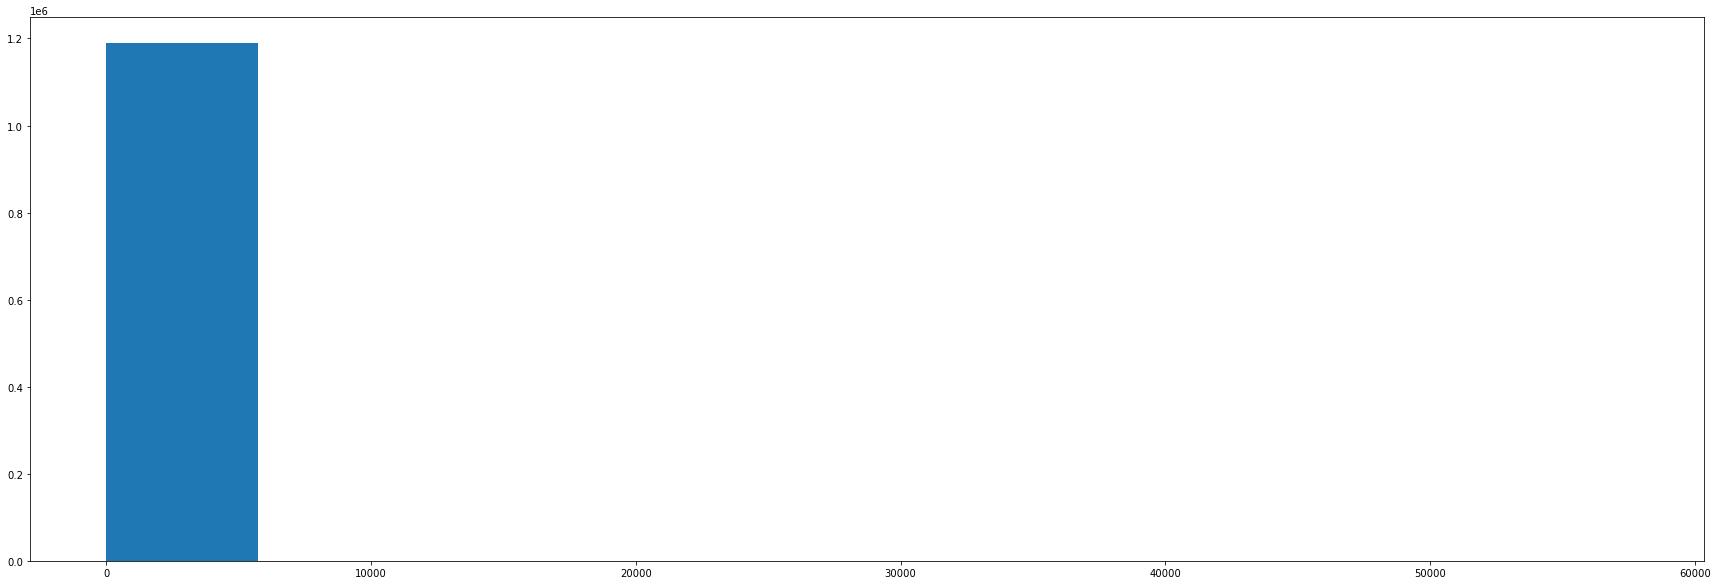

<Figure size 2160x720 with 0 Axes>

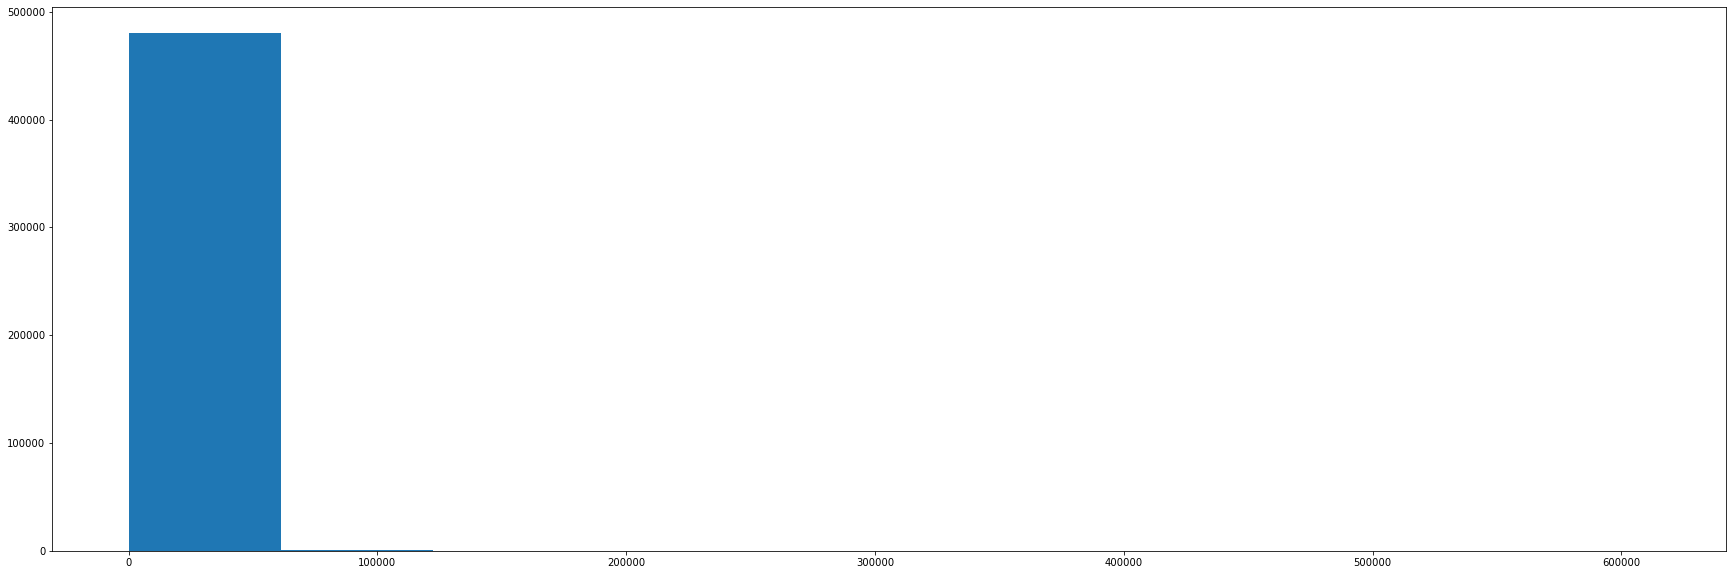

<Figure size 2160x720 with 0 Axes>

In [42]:
lst2=['Surface reelle bati','Surface terrain']
for elem in lst2:
    plt.figure(figsize=(30,10))
    plt.hist(Data[elem])
    plt.figure(figsize=(30,10))
    print("------------------------------------")
    print("Stats %s"%elem)
    print(Data[elem].describe())

* Nous remarquons la presence de valeurs extremes pour ces deux variables

#### Identification des valeurs incoherentes 

In [43]:
#Analyse des valeurs extremes surfaces reeles batis
Data[Data['Surface reelle bati']>500] 
Data[Data['Surface reelle bati']>500][Data['Code type local']<4] 

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
18360,2016,Vente,445000.00,RUE,FONTAINEBLEAU,77,1.00,567.00,13.00,NaN,NaN,2
23111,2016,Vente,205000.00,RUE,CHESSY,77,2.00,508.00,0.00,NaN,NaN,3
48324,2016,Vente,750000.00,AV,CLAYES-SOUS-BOIS (LES),78,1.00,758.00,0.00,377.00,S,0
69102,2016,Vente,270000.00,AV,DRAVEIL,91,1.00,550.00,0.00,335.00,S,0
269217,2017,Vente,740290.00,RUE,URY,77,1.00,510.00,10.00,1000.00,S,0
269218,2017,Vente,740290.00,RUE,URY,77,1.00,510.00,10.00,4838.00,AG,0
601688,2017,Vente,740000.00,RUE,NERVILLE-LA-FORET,95,1.00,611.00,12.00,1265.00,S,0
622286,2017,Vente,256340.00,PL,SAINT-PRIX,95,1.00,700.00,28.00,816.00,S,0
770307,2018,Vente,588600.00,RUE,MEIGNEUX,77,1.00,578.00,12.00,2000.00,AG,0
770308,2018,Vente,588600.00,RUE,MEIGNEUX,77,1.00,578.00,12.00,401.00,S,0


* Nous avons du 4 ( qui est le code type local des locaux industriels) ce qui semble expliquer ces valeurs extremes
* Nous remarquons aussi qu il existe des maisons (code type local = 1) avec des surface reelle bati > 500 ce qui n'est pas possible pour une maison



In [44]:
#Analyse des valeurs extremes surfaces terrains
Data[Data['Surface terrain']>50000]

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
2135,2016,Vente,770000.00,NaN,BOISSISE-LA-BERTRAND,77,NaN,NaN,NaN,150054.00,AG,0
3695,2016,Vente,650000.00,NaN,AUBEPIERRE-OZOUER-LE-REPOS,77,NaN,NaN,NaN,54343.00,T,0
3696,2016,Vente,650000.00,NaN,AUBEPIERRE-OZOUER-LE-REPOS,77,NaN,NaN,NaN,51513.00,T,0
3710,2016,Vente,650000.00,NaN,AUBEPIERRE-OZOUER-LE-REPOS,77,NaN,NaN,NaN,168936.00,T,0
3713,2016,Vente,650000.00,NaN,AUBEPIERRE-OZOUER-LE-REPOS,77,NaN,NaN,NaN,109911.00,T,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2215850,2021,Vente,154800.00,NaN,ABLEIGES,95,NaN,NaN,NaN,105635.00,T,0
2215851,2021,Vente,154800.00,NaN,ABLEIGES,95,NaN,NaN,NaN,62463.00,T,0
2215861,2021,Vente,154800.00,NaN,COURCELLES-SUR-VIOSNE,95,NaN,NaN,NaN,50086.00,T,0
2217985,2021,Vente,170000.00,NaN,SEUGY,95,NaN,NaN,NaN,90306.00,BT,0


* Nous remarquons que pour les valeurs foncières ayant des surfaces terrain > 50000, le code type local est toujours non renseigné. Il s'agit très probablement terrains à vendre. 
* Traitement possible:  changer la colonne type local et créer une autre colonne type de biens : 1_Maison 2_Appart ... 5_Terrain

In [45]:
#Analyse incohèrence avec surface terrain
Data[Data['Code type local']==1][(Data['Surface terrain'].isnull()) | (Data['Surface terrain']==0)]

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
50,2016,Vente,194500.00,CHE,NANDY,77,1.00,97.00,5.00,NaN,NaN,1
59,2016,Vente,285000.00,RUE,PRESLES-EN-BRIE,77,1.00,91.00,4.00,NaN,NaN,1
61,2016,Vente,364000.00,RUE,OZOIR LA FERRIERE,77,1.00,140.00,6.00,NaN,NaN,1
62,2016,Vente,305000.00,AV,PONTAULT COMBAULT,77,1.00,93.00,7.00,NaN,NaN,1
85,2016,Vente,241700.00,RUE,SAINT-FARGEAU-PONTHIERRY,77,1.00,68.00,4.00,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2250575,2021,Vente,641000.00,RUE,PARIS 13,75,1.00,66.00,4.00,NaN,NaN,1
2251249,2021,Vente,373500.00,RUE,PARIS 14,75,1.00,172.00,6.00,NaN,NaN,4
2253955,2021,Vente,737300.00,RUE,PARIS 15,75,1.00,65.00,3.00,NaN,NaN,2
2255594,2021,Vente,650000.00,RUE,PARIS 16,75,1.00,33.00,2.00,NaN,NaN,2


* Il y a des maisons avec des surfaces terrains non renseignées
* Traitement possible : suppression ou remplacement par la moyenne des surfaces terrain par departement

In [46]:
#Analyse de incohèrence avec surface réelle bati
Data[(Data['Code type local']==1 |(Data['Code type local']==2))][(Data['Surface reelle bati'].isnull()) | (Data['Surface reelle bati']==0)]

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
1341975,2019,Vente en l'état futur d'achèvement,360000.00,PL,MOLIERES (LES),91,1.00,NaN,NaN,NaN,NaN,1


* il y a une maison pour laquelle la surface réelle bait est manquante. Nous decidons de supprimer cette ligne par la suite 

### 3- Visualisation des relations : variables/targets

In [47]:
def GraphiqueRelations(nom,lst_valeurs,Quantiles,l):
    if Quantiles==True:
        Datana=Data.dropna(subset=[nom])
        Datana=Datana[Datana[nom]>0]

        q1,q2,q3,q4 = np.percentile(Datana[nom],[25,50,75,100])
        Data1=Datana[(Datana[nom]<q1)]
        Data2=Datana[(Datana[nom]>=q1) & (Datana[nom]<q2)]
        Data3=Datana[(Datana[nom]>=q2) & (Datana[nom]<q3)]
        Data4=Datana[(Datana[nom]>=q3) & (Datana[nom]<q4)]

        plt.figure(figsize=(10,10))
        sns.distplot(Data1['Valeur fonciere'], label='q1')
        sns.distplot(Data2['Valeur fonciere'], label='q2')
        sns.distplot(Data3['Valeur fonciere'], label='q3')
        sns.distplot(Data4['Valeur fonciere'], label='q4')
        plt.legend()
        plt.title('Graphique quartiles %s'%nom)
    
    else:
        plt.figure(figsize=(l,10))
        for elem in lst_valeurs:
            sns.distplot(Data[Data[nom]==elem]['Valeur fonciere'], label=elem)
        plt.legend()
        plt.title('Graphique %s' %nom)            

##### Relation Target / Type local

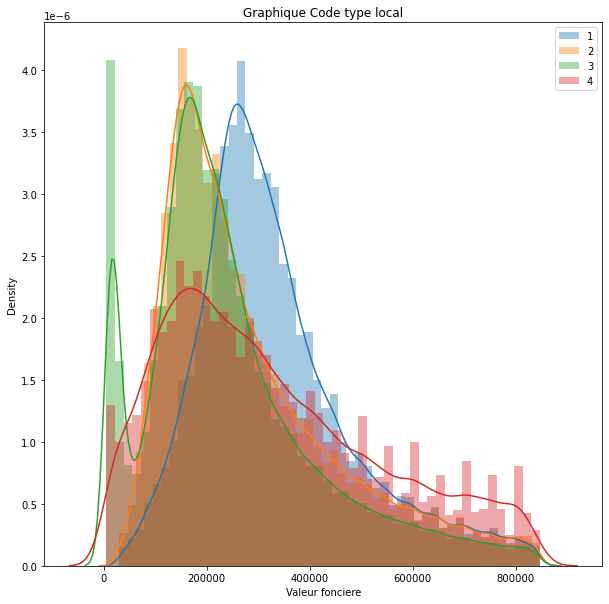

In [48]:
GraphiqueRelations('Code type local',[1,2,3,4],False,10)

##### Relation Target / Date Achat

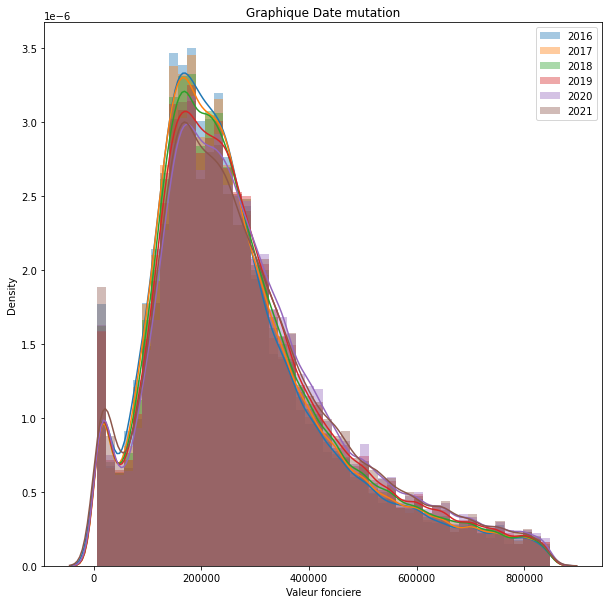

In [49]:
GraphiqueRelations('Date mutation',[2016,2017,2018,2019,2020,2021],False,10)

##### Relation Target / Departement

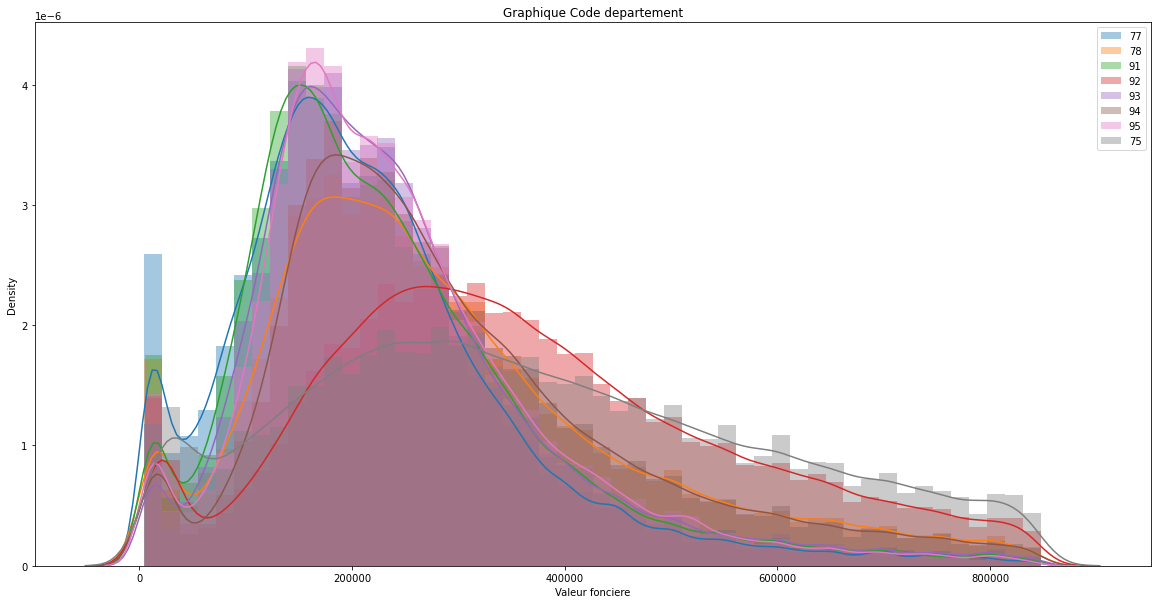

In [50]:
lst_dep=Data['Code departement'].unique()
GraphiqueRelations('Code departement',lst_dep,False,20)

##### Relation Target / Type Rue

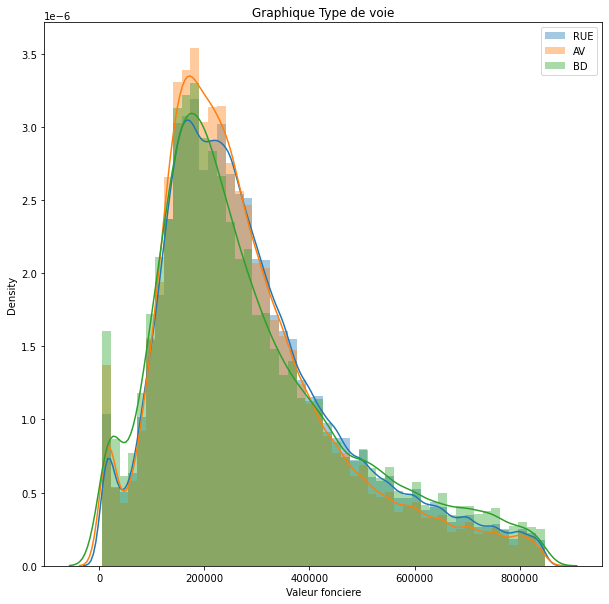

In [51]:
GraphiqueRelations('Type de voie',['RUE','AV','BD'],False,10)

#### Relation Target/Surface_terrain et Surface Bati

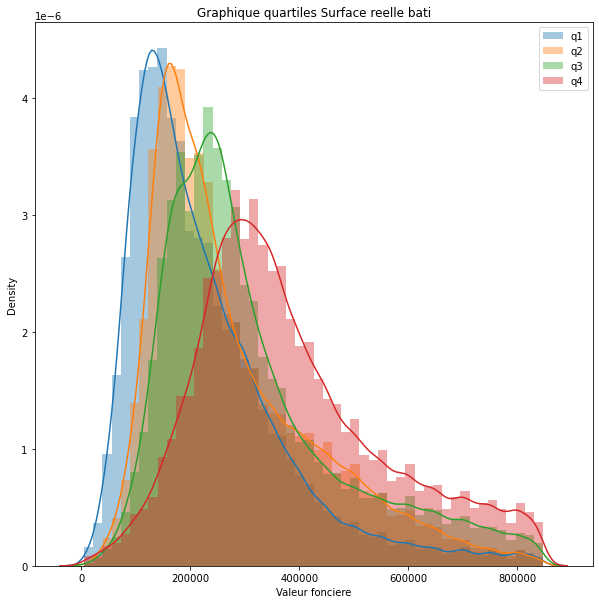

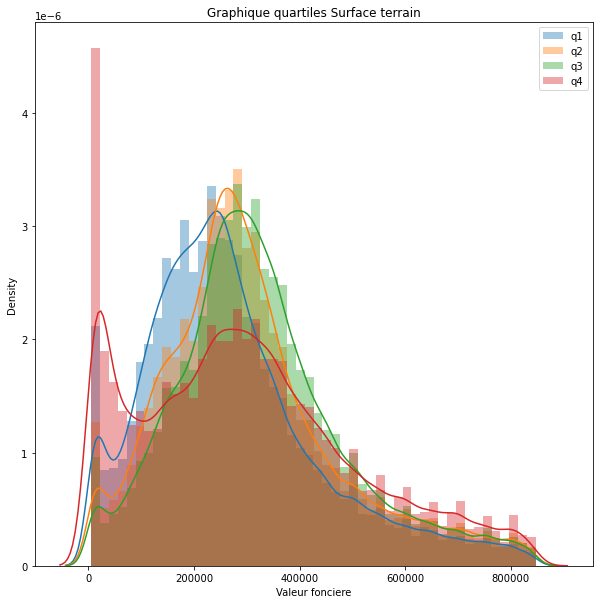

In [52]:
GraphiqueRelations('Surface reelle bati',[],True,10)
GraphiqueRelations('Surface terrain',[],True,10)


#### Relation Target/Nombre de lots

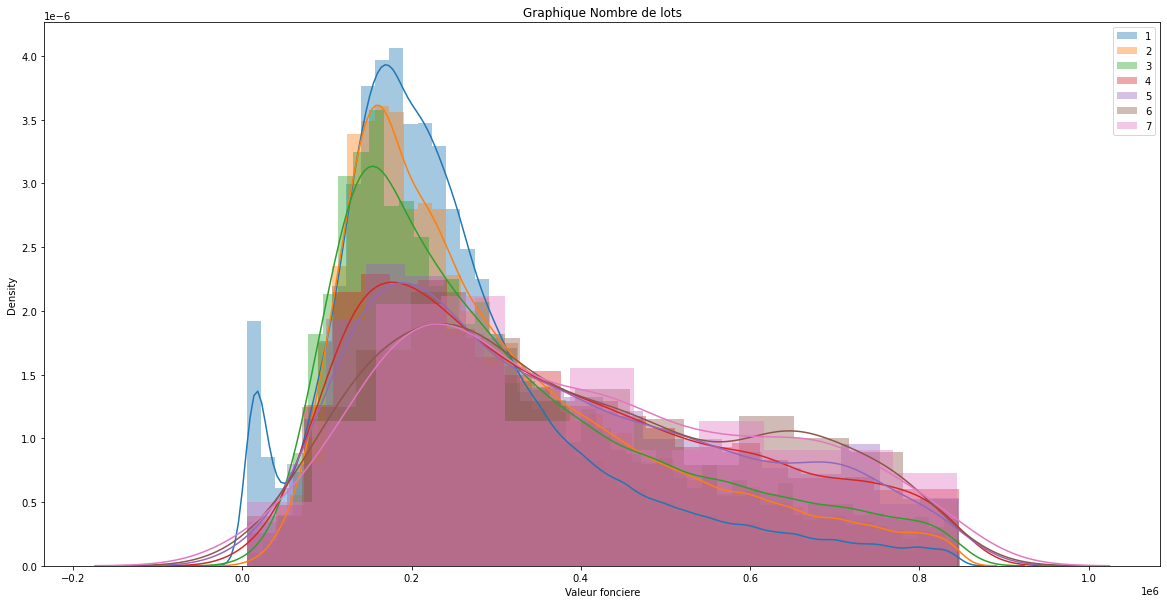

In [53]:
lst=Data['Nombre de lots'].unique()
GraphiqueRelations('Nombre de lots',[1,2,3,4,5,6,7],False,20)

#### Relation Target/Nature culture

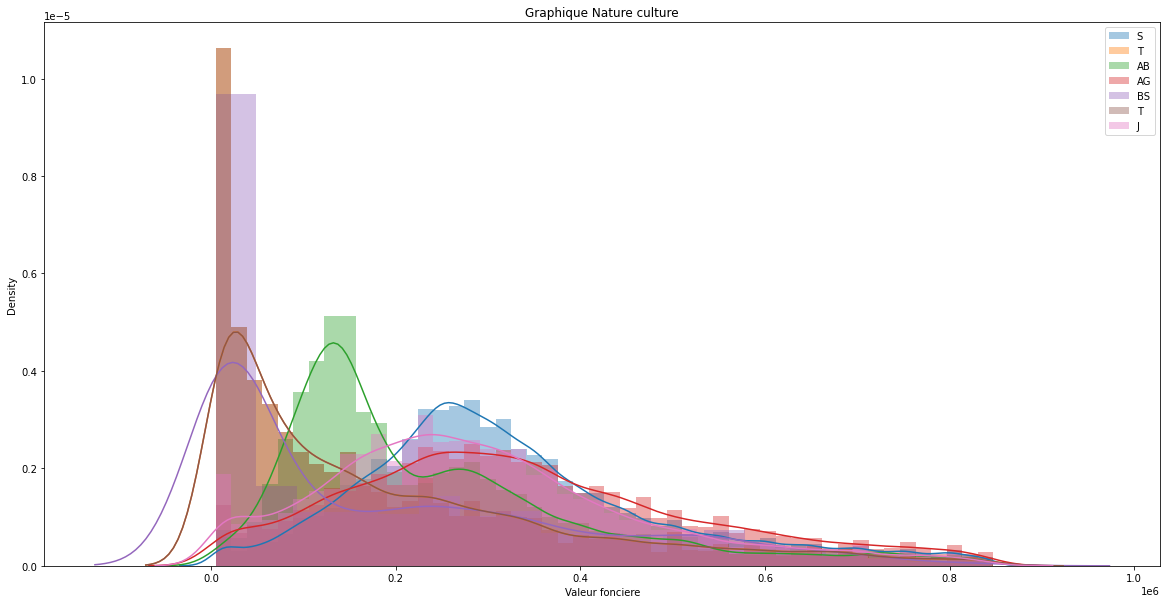

In [54]:
GraphiqueRelations('Nature culture',['S','T','AB','AG','BS','T','J'],False,20)

#### Relation Target/Nature mutation

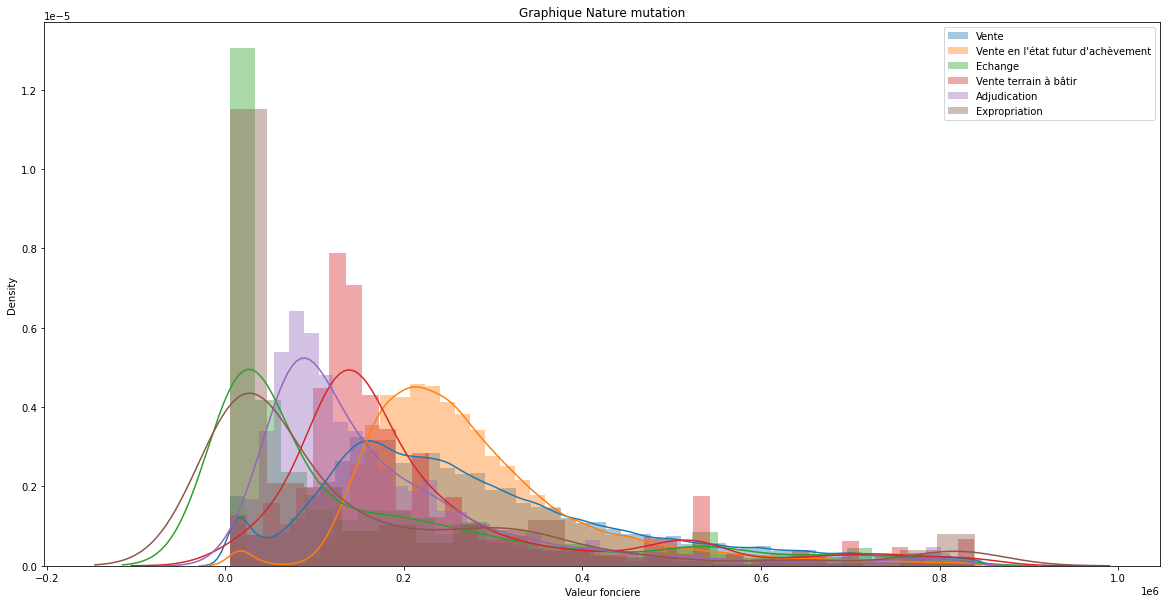

In [55]:
lst=Data['Nature mutation'].unique()
GraphiqueRelations('Nature mutation',lst,False,20)

#### Etude des correlations

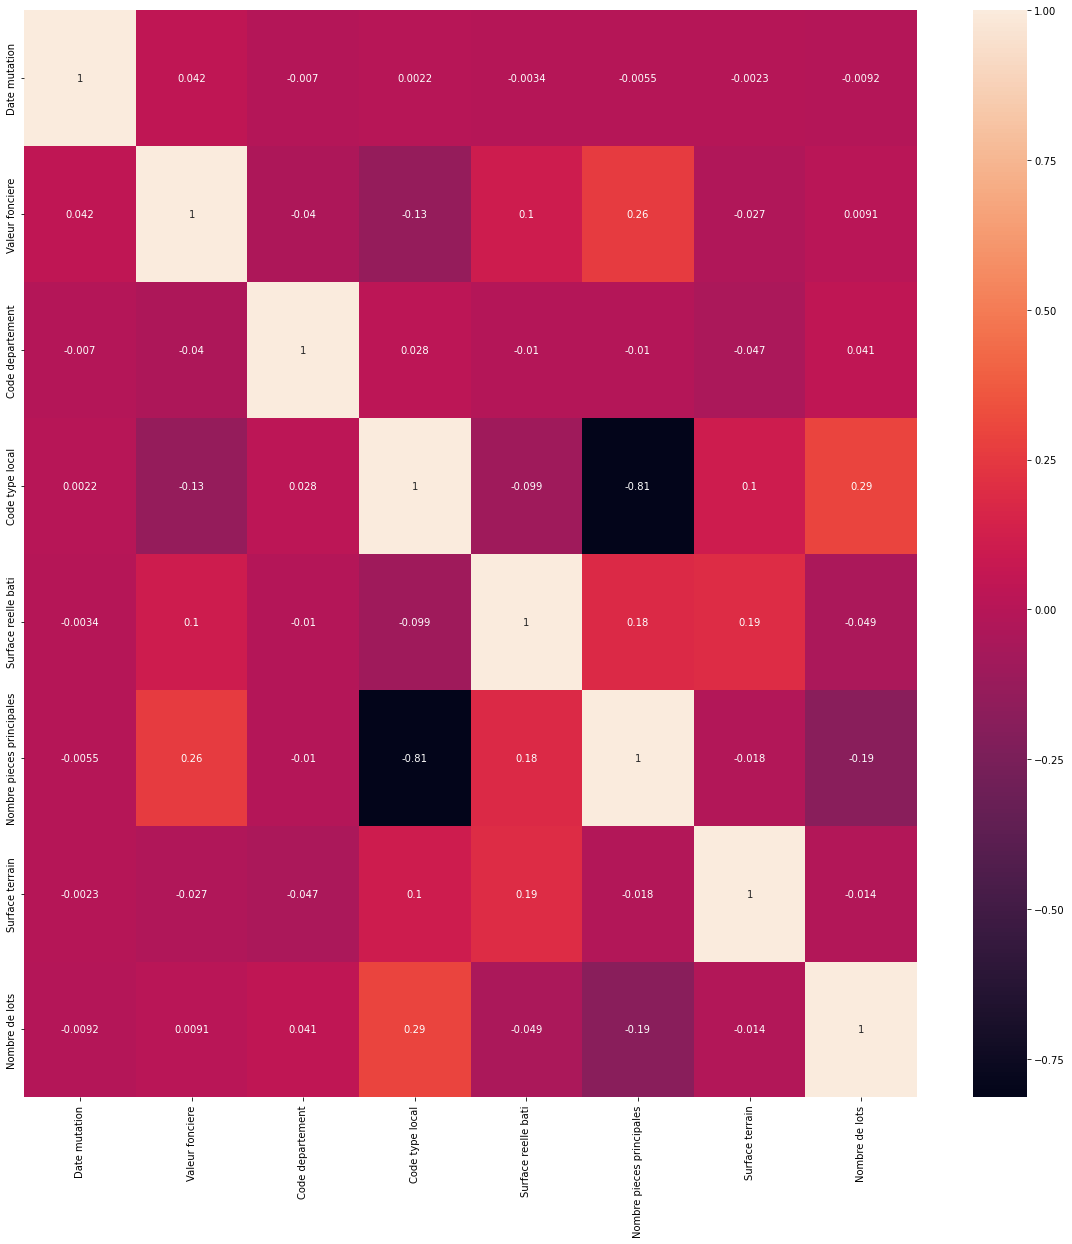

In [56]:
# Création et affichage du corrélogramme
cor=Data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cor, annot=True)
plt.show()

# III. Preprocessing

In [57]:
DataPrePro=Data
Data

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
0,2016,Vente,293000.00,RUE,SAINT-SAUVEUR-SUR-ECOLE,77,1.00,136.00,6.00,416.00,S,0
1,2016,Vente,189000.00,NaN,SAVIGNY-LE-TEMPLE,77,NaN,NaN,NaN,17.00,AB,0
2,2016,Vente,189000.00,MAIL,SAVIGNY-LE-TEMPLE,77,1.00,67.00,3.00,94.00,S,0
3,2016,Vente,119000.00,AV,ROISSY-EN-BRIE,77,3.00,0.00,0.00,NaN,NaN,1
4,2016,Vente,119000.00,AV,ROISSY-EN-BRIE,77,2.00,55.00,2.00,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2260809,2021,Vente,230000.00,RUE,PARIS 02,75,2.00,15.00,1.00,NaN,NaN,3
2260810,2021,Vente,400000.00,RUE,PARIS 04,75,2.00,25.00,1.00,NaN,NaN,1
2260811,2021,Vente,400000.00,RUE,PARIS 04,75,2.00,26.00,1.00,NaN,NaN,1
2260812,2021,Vente,383000.00,RUE,PARIS 04,75,2.00,30.00,2.00,NaN,NaN,2


## A. Mettre les données dans un format propice au ML

### 1. Nettoyage des NaN
* **Percetage de valeurs manquantes**

In [58]:
(DataPrePro.isna().sum()/DataPrePro.shape[0]).sort_values(ascending=True)

Date mutation               0.00
Nature mutation             0.00
Valeur fonciere             0.00
Commune                     0.00
Code departement            0.00
Nombre de lots              0.00
Type de voie                0.11
Code type local             0.19
Surface reelle bati         0.19
Nombre pieces principales   0.19
Surface terrain             0.67
Nature culture              0.67
dtype: float64

#### Type de Voie : 
* Nous supprimons cette colonne car l'analyse n'a pas indiqué une influence de cette variable sur la valeur foncière.

In [59]:
DataPrePro=DataPrePro.drop('Type de voie',axis=1)

#### Code type local/Surface Reel bati/Nb pieces principales
* Ces 3 variables ont le meme taux de valeurs manquantes : cela est liée aux ventes de terrains pour lesqeulles ces valeurs sont manquantes.

In [60]:

#Pour changer les nan : -Vte en etat futur achevement a supprimer comment tu peux deviner si t'as aucune info sur pieces..
                       # -Pour les terrains : changer type local en ajoutant un 5 et mettre nb de pieces et surfaces à 0

* Nous supprimons les vente en futur état d'achevement pour lesqeulles il y a des valeurs manquantes

In [61]:
# Pour bcp de Vente en etat future d'achevement on a pas de nb piece...
DataPrePro.drop( DataPrePro[ (DataPrePro['Nature mutation']=="Vente en l'état futur d'achèvement") &
                            (DataPrePro['Code type local'].isna()) ].index, inplace=True)

* Nous supprimons les lignes pour lesquelles le code type local et la surface terrain ne sont pas renseignés

In [62]:
# supprimer les nan code type local et Surafce terrain : car en absence de ces deux valeurs la ligne n'est pas exploitable
DataPrePro.drop(DataPrePro[(DataPrePro['Code type local'].isna()) &
                                      (DataPrePro['Surface terrain'].isna())].index,inplace=True)

In [63]:
DataPrePro

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
0,2016,Vente,293000.00,SAINT-SAUVEUR-SUR-ECOLE,77,1.00,136.00,6.00,416.00,S,0
1,2016,Vente,189000.00,SAVIGNY-LE-TEMPLE,77,NaN,NaN,NaN,17.00,AB,0
2,2016,Vente,189000.00,SAVIGNY-LE-TEMPLE,77,1.00,67.00,3.00,94.00,S,0
3,2016,Vente,119000.00,ROISSY-EN-BRIE,77,3.00,0.00,0.00,NaN,NaN,1
4,2016,Vente,119000.00,ROISSY-EN-BRIE,77,2.00,55.00,2.00,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
2260809,2021,Vente,230000.00,PARIS 02,75,2.00,15.00,1.00,NaN,NaN,3
2260810,2021,Vente,400000.00,PARIS 04,75,2.00,25.00,1.00,NaN,NaN,1
2260811,2021,Vente,400000.00,PARIS 04,75,2.00,26.00,1.00,NaN,NaN,1
2260812,2021,Vente,383000.00,PARIS 04,75,2.00,30.00,2.00,NaN,NaN,2


Nous avons conclut que les Nan sur ces 3 colonnes sont liées au fait qu'il s'agit de terrains vendus. De ce fait :
* On remplace le code type local de ces lignes par 5 qui desormais indique que le bien immobilier est un terrain
* On remplace la suraface réelle bati et le nb de pièces principales par 0.

In [64]:
# On remplace les valeurs manquantes par la valeur 5
DataPrePro['Code type local']=DataPrePro['Code type local'].fillna(5)

# On remplace les valeurs manquantes par la valeur 0
lst=['Surface reelle bati','Nombre pieces principales']
for elem in lst:
    DataPrePro[elem]=DataPrePro[elem].fillna(0)

#### Surface terrain et nature culture
* Nous remplacons les valeurs manquantes de Nature Culture par NR

In [65]:
DataPrePro['Nature culture']=DataPrePro['Nature culture'].fillna('NR')            

A ce stade il reste que des valeurs manquantes pour la suarface terrain
* On remplace ces valeurs manquantes par 0. Puis en fonction de la performance du modèle on pourrait etr amené à changer cela: par exemple remplacer les valeurs manquantes plutot par la moyenne des surface terrains dans le departement pour les maisons.

In [66]:
#On commence par mettre 0 à tous
DataPrePro.fillna(0,inplace=True)


* **Percetage de valeurs manquantes**

In [67]:
(DataPrePro.isna().sum()/DataPrePro.shape[0]).sort_values(ascending=True)

Date mutation               0.00
Nature mutation             0.00
Valeur fonciere             0.00
Commune                     0.00
Code departement            0.00
Code type local             0.00
Surface reelle bati         0.00
Nombre pieces principales   0.00
Surface terrain             0.00
Nature culture              0.00
Nombre de lots              0.00
dtype: float64

### 2. Encodage
* Nous allons encoder le nom des villes,les codes departements,la Nature mutation etla nature culture, afin d'obtenir une continuité dans les chiffres des ces colonnes 

In [68]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

lst=['Nature mutation','Commune','Nature culture','Nature mutation','Code departement']

for elem in lst:
    DataPrePro[elem]=encoder.fit_transform(DataPrePro[elem])

In [69]:
DataPrePro

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
0,2016,3,293000.00,1084,1,1.00,136.00,6.00,416.00,18,0
1,2016,3,189000.00,1110,1,5.00,0.00,0.00,17.00,0,0
2,2016,3,189000.00,1110,1,1.00,67.00,3.00,94.00,18,0
3,2016,3,119000.00,990,1,3.00,0.00,0.00,0.00,16,1
4,2016,3,119000.00,990,1,2.00,55.00,2.00,0.00,16,1
...,...,...,...,...,...,...,...,...,...,...,...
2260809,2021,3,230000.00,901,0,2.00,15.00,1.00,0.00,16,3
2260810,2021,3,400000.00,903,0,2.00,25.00,1.00,0.00,16,1
2260811,2021,3,400000.00,903,0,2.00,26.00,1.00,0.00,16,1
2260812,2021,3,383000.00,903,0,2.00,30.00,2.00,0.00,16,2


## B. Création premier modèle

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn import tree


modelLR=LinearRegression() 
modelTree=tree.DecisionTreeRegressor(random_state=0) #on met à 0 pour toujours avoir le même score


* Nous avons crée une fonction évaluation,qui à partir d'un DataSet et d'un de modèle de maching learning, va créer le modèle et sortir un dictionnaire contenant tous les statistiques de performance du modèle choisi
* Cette fonction affiche également si le parametre Lc est rentré à True, la courbe d'apprentissage du modèle. Cette fonction est très utile pour visualiser la performance du modèle  a chaque fois qu'on apporte des changements au dataset

In [71]:
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve


def evaluationML(Data,model,LC):
    
    #separation trainset et test_set...
    trainset, testset = train_test_split(Data, test_size=0.2, random_state=0)
    
    #separation en x et y
    X_train,Y_train=Sep(trainset)
    X_test,Y_test=Sep(testset)
    
    #entrainement du modèle
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    
    #stats du modele
    TableauStatsPerf(Y_test,y_pred)
    
    

    if LC==True: #on met en if pour pas avoir tout le temps à le faire car ca prend du temsps

        N,train_score,val_score=learning_curve(model,X_train,Y_train,
                                               train_sizes=np.linspace(0.1, 1, 10), cv=5)

        plt.plot(N, train_score.mean(axis=1), label='train')
        plt.plot(N, val_score.mean(axis=1), label='validation')
        plt.xlabel('train_sizes')
        plt.legend()
        
    
def Sep(Data):
    X=Data.drop('Valeur fonciere',axis=1);
    Y=Data['Valeur fonciere']
    
    return X,Y  

def TableauStatsPerf(y_test,y_pred):
    dico={'RMSE':round(np.sqrt(mean_squared_error(y_test,y_pred)),5),
     'MAE':round(mean_absolute_error(y_test,y_pred),5),
     'MSE':round(mean_squared_error(y_test,y_pred),5),
     'R2':round(r2_score(y_test,y_pred),5)
    }

    print("La performance du modèle")
    print('---------------------------------------------')

    print(dico)

      

* **Modèle de regression linéaire**

La performance du modèle
---------------------------------------------
{'RMSE': 166083.30993, 'MAE': 127828.57233, 'MSE': 27583665838.94332, 'R2': 0.08706}


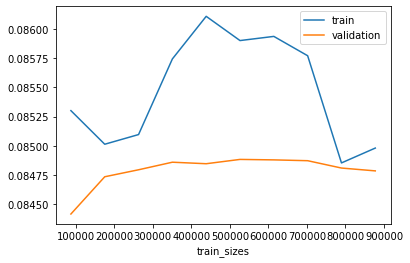

In [72]:
evaluationML(DataPrePro,modelLR,True)

* **Modèle d'arbre de decision**

La performance du modèle
---------------------------------------------
{'RMSE': 144161.01557, 'MAE': 91803.6862, 'MSE': 20782398409.01863, 'R2': 0.31217}


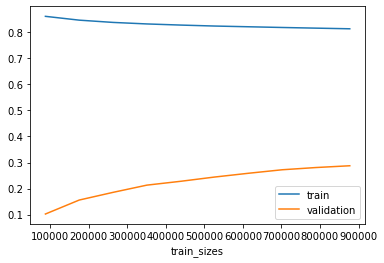

In [73]:
evaluationML(DataPrePro,modelTree,True)

* Si on considère uniquement les appart le r2 augmente pour les deux modèles mais ca diminue pour les maisons

In [74]:
data=DataPrePro[DataPrePro['Code type local']==2]
evaluationML(data,modelTree,False) 

La performance du modèle
---------------------------------------------
{'RMSE': 107958.61145, 'MAE': 65068.74953, 'MSE': 11655061785.65581, 'R2': 0.6023}


In [75]:
data=DataPrePro[DataPrePro['Code type local']==1]
evaluationML(data,modelTree,False)

La performance du modèle
---------------------------------------------
{'RMSE': 133628.69013, 'MAE': 91592.70507, 'MSE': 17856626825.94912, 'R2': 0.21705}


## C. Ameliorer la performance du modèle

In [76]:
Data=DataPrePro
Data

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
0,2016,3,293000.00,1084,1,1.00,136.00,6.00,416.00,18,0
1,2016,3,189000.00,1110,1,5.00,0.00,0.00,17.00,0,0
2,2016,3,189000.00,1110,1,1.00,67.00,3.00,94.00,18,0
3,2016,3,119000.00,990,1,3.00,0.00,0.00,0.00,16,1
4,2016,3,119000.00,990,1,2.00,55.00,2.00,0.00,16,1
...,...,...,...,...,...,...,...,...,...,...,...
2260809,2021,3,230000.00,901,0,2.00,15.00,1.00,0.00,16,3
2260810,2021,3,400000.00,903,0,2.00,25.00,1.00,0.00,16,1
2260811,2021,3,400000.00,903,0,2.00,26.00,1.00,0.00,16,1
2260812,2021,3,383000.00,903,0,2.00,30.00,2.00,0.00,16,2


### 1. Gestion des valeurs manquantes et outliers

* Suppression des valeurs extremes du nombre de pièces

In [77]:
#on va voir quel est le meilleur nb de pieces à considérer entre 4 et 15
for i in range(4,15):
    print("Nb pièces %i" %i)
    DataBis=Data[Data['Nombre pieces principales']<=i]
    evaluationML(DataBis,modelTree,False)

#Resultat : On voit quéà partir de 10 pieces on a le R2 qui commence a stagner et etre proche du modele de base
#On va donc supprimer les lignes avec le nb de pièces supérieur à 10


Nb pièces 4
La performance du modèle
---------------------------------------------
{'RMSE': 145245.41962, 'MAE': 91841.88709, 'MSE': 21096231921.514, 'R2': 0.27844}
Nb pièces 5
La performance du modèle
---------------------------------------------
{'RMSE': 144146.9953, 'MAE': 91312.70626, 'MSE': 20778356253.20074, 'R2': 0.2966}
Nb pièces 6
La performance du modèle
---------------------------------------------
{'RMSE': 143291.41868, 'MAE': 91109.27154, 'MSE': 20532430667.34814, 'R2': 0.30893}
Nb pièces 7
La performance du modèle
---------------------------------------------
{'RMSE': 144119.66118, 'MAE': 91628.84226, 'MSE': 20770476738.62236, 'R2': 0.30751}
Nb pièces 8
La performance du modèle
---------------------------------------------
{'RMSE': 144172.02165, 'MAE': 91702.26791, 'MSE': 20785571827.44802, 'R2': 0.30859}
Nb pièces 9
La performance du modèle
---------------------------------------------
{'RMSE': 144032.43163, 'MAE': 91722.32119, 'MSE': 20745341361.22132, 'R2': 0.31071}
Nb

In [78]:
Data=Data[Data['Nombre pieces principales']<10]
evaluationML(Data,modelTree,False)

La performance du modèle
---------------------------------------------
{'RMSE': 144032.43163, 'MAE': 91722.32119, 'MSE': 20745341361.22132, 'R2': 0.31071}


In [79]:
#pas possible d'avoir des habitations à plus de 7 pieces et moins de 100 m2
Data=Data.drop(Data[(Data['Nombre pieces principales']>7) & (Data['Surface reelle bati']<100)].index)
evaluationML(Data,modelTree,False)

La performance du modèle
---------------------------------------------
{'RMSE': 143519.77841, 'MAE': 91281.86008, 'MSE': 20597926794.9956, 'R2': 0.31604}


* Gestion des maisons et appartements à 0 pièces.On va supprimer cs valeurs


In [80]:
#Suppression
Data=Data.drop(Data[(Data['Nombre pieces principales']==0) & ((Data['Code type local']==1) | (Data['Code type local']==2))].index)
evaluationML(Data,modelTree,False)

#On baisse tres peu et on reste proche mais on doit supprimer ces valeurs car pas possible d'avoir des maisons et des apparts
#sans pieces

La performance du modèle
---------------------------------------------
{'RMSE': 143899.56941, 'MAE': 91404.52314, 'MSE': 20707086077.1494, 'R2': 0.31314}


* Voir les ventes de terrain à batir avec un code type local diff de 5 et avec des pieces. A supprimer

In [81]:
Data=Data.drop(Data[(Data['Nature mutation']==5)&(Data['Nombre pieces principales']>0)].index)
evaluationML(Data,modelTree,False)
#Ca change quasi rien mais ce sont de mauvaises valeurs on doit les supprimer


La performance du modèle
---------------------------------------------
{'RMSE': 144963.77694, 'MAE': 92179.49345, 'MSE': 21014496623.80879, 'R2': 0.3063}


* Valeurs extremes de nombres de lots

In [82]:
Data=Data.drop(Data[(Data['Nombre de lots']>7)].index)
evaluationML(Data,modelTree,False)

La performance du modèle
---------------------------------------------
{'RMSE': 143979.38484, 'MAE': 91706.47372, 'MSE': 20730063258.68757, 'R2': 0.31171}


* valeurs extremes pour les surafces batis 

In [83]:
#On a fixe à plus de 500m2 la valeur extreme
Data=Data.drop(Data[(Data['Surface reelle bati']>500)].index)
evaluationML(Data,modelTree,False)

La performance du modèle
---------------------------------------------
{'RMSE': 143922.23562, 'MAE': 91549.55753, 'MSE': 20713609904.97885, 'R2': 0.31049}


* valeurs extremes de surface terrain

In [84]:
Data=Data.drop(Data[(Data['Surface terrain']>100000)].index)
evaluationML(Data,modelTree,False)
#encore une fois on supprime des valeurs extremes ou abherentes et ca rend pas le modele meilleur.

La performance du modèle
---------------------------------------------
{'RMSE': 143760.10353, 'MAE': 91523.22978, 'MSE': 20666967367.03314, 'R2': 0.30956}


* maisons avec des terrains à 0

In [85]:
#maisons avec des terrains à 0
Data=Data.drop(Data[(Data['Code type local']==1)&(Data['Surface terrain']==0)].index)
evaluationML(Data,modelTree,False)

La performance du modèle
---------------------------------------------
{'RMSE': 144376.2563, 'MAE': 91825.60958, 'MSE': 20844503384.42152, 'R2': 0.30791}


#### Conclusion

La performance du modèle
---------------------------------------------
{'RMSE': 144376.2563, 'MAE': 91825.60958, 'MSE': 20844503384.42152, 'R2': 0.30791}


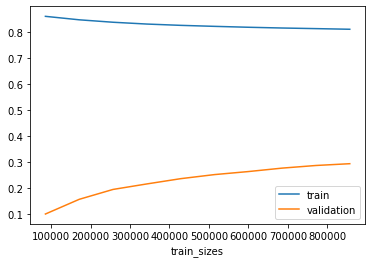

In [86]:
evaluationML(Data,modelTree,True)


On a supprimé toutes les valeurs qui nous semblaient abherentes. Au final ca n'a rien change sur la performance du modele ce qui est comphrenseble car à chaque fois les valeurs abherentes sont en tres petit nombre par rapport à la taille de l'échantillon total.On va maintenant passer à la feature selection qui est une etape qui devrait reellement améliorer la perfomance du modèle

### 2. Feature Selection

#### Normalisation

In [87]:
#La normalisation n'est pas nécessaire pour un modèle d'Arbre de decsion mais pour les autres cela est nécessaire
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler

DataNorm=MinMaxScaler().fit_transform(Data)

DataNorm=pd.DataFrame(DataNorm)
DataNorm.columns=DataPrePro.columns

evaluationML(DataNorm,modelTree,False)

La performance du modèle
---------------------------------------------
{'RMSE': 0.17141, 'MAE': 0.10902, 'MSE': 0.02938, 'R2': 0.30762}


#### Utilisation de la correlation

In [88]:
#Comme on l'avait dit apres l'étude de la table des correlations, on avait 3 variables qui avaient une correl plus éleves
#Type local, nb pieces, surface batis
DataC=Data[['Valeur fonciere','Code type local','Surface reelle bati','Nombre pieces principales']]
evaluationML(DataC,modelTree,False) #NUL

La performance du modèle
---------------------------------------------
{'RMSE': 161588.44553, 'MAE': 123284.96161, 'MSE': 26110825729.28174, 'R2': 0.13305}


#### Test de f_regression

In [89]:
from sklearn.feature_selection import SelectKBest,f_regression

In [90]:
def SelectionVar(Data,test,nb_var,LC):
    X,y=Sep(Data)
    selector = SelectKBest(test, k=nb_var) #retourne les 2 meilleurs var avec le 
    selector.fit(X, y)
    selector.scores_
    
    lst=list(np.array(X.columns)[selector.get_support()])
    print('Variables selectionnées')
    print(lst)
    lst.append('Valeur fonciere')
    
    evaluationML(Data[lst],modelTree,LC)
  


In [91]:
for i in range(1,len(Data.columns)):
    print("nb variables selectionnées %d"%i)
    SelectionVar(Data,f_regression,i,False)
    print('')

nb variables selectionnées 1
Variables selectionnées
['Surface reelle bati']
La performance du modèle
---------------------------------------------
{'RMSE': 163956.89147, 'MAE': 125888.73605, 'MSE': 26881862262.00606, 'R2': 0.10745}

nb variables selectionnées 2
Variables selectionnées
['Surface reelle bati', 'Nombre pieces principales']
La performance du modèle
---------------------------------------------
{'RMSE': 162783.12848, 'MAE': 124514.77919, 'MSE': 26498346916.96953, 'R2': 0.12018}

nb variables selectionnées 3
Variables selectionnées
['Code type local', 'Surface reelle bati', 'Nombre pieces principales']
La performance du modèle
---------------------------------------------
{'RMSE': 161588.44553, 'MAE': 123284.96161, 'MSE': 26110825729.28174, 'R2': 0.13305}

nb variables selectionnées 4
Variables selectionnées
['Code departement', 'Code type local', 'Surface reelle bati', 'Nombre pieces principales']
La performance du modèle
---------------------------------------------
{'RMS

Variables selectionnées
['Commune', 'Code departement', 'Code type local', 'Surface reelle bati', 'Nombre pieces principales', 'Nature culture']
La performance du modèle
---------------------------------------------
{'RMSE': 131501.67107, 'MAE': 86560.50751, 'MSE': 17292689493.55246, 'R2': 0.42584}


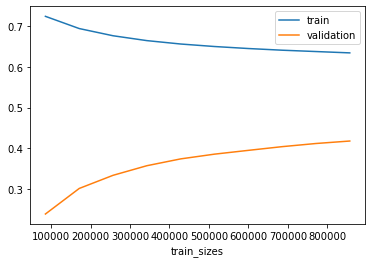

In [92]:
SelectionVar(Data,f_regression,6,True)


Variables selectionnées
['Date mutation', 'Nature mutation', 'Commune', 'Code departement', 'Code type local', 'Surface reelle bati', 'Nombre pieces principales', 'Nature culture']
La performance du modèle
---------------------------------------------
{'RMSE': 134346.77521, 'MAE': 86442.22005, 'MSE': 18049056009.7857, 'R2': 0.40072}


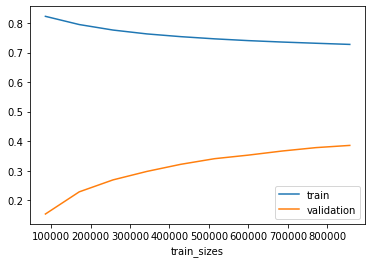

In [93]:
SelectionVar(Data,f_regression,8,True)

# IV. Analyse Impact Covid

#### 1. On remet les noms des departements

In [94]:
DataFin=Data.copy()

In [95]:
#1On remet les noms des departements
def dep(num):
    if num==0:
        return '75'
    elif num==1:
        return '77'
    elif num==2:
        return '78'
    elif num==3:
        return '91'
    elif num==4:
        return '92'
    elif num==5:
        return '93'
    elif num==6:
        return '94'
    elif num==7:
        return '95'

In [96]:
DataFin['Code departement']=DataFin['Code departement'].map(dep)
DataFin

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
0,2016,3,293000.00,1084,77,1.00,136.00,6.00,416.00,18,0
1,2016,3,189000.00,1110,77,5.00,0.00,0.00,17.00,0,0
2,2016,3,189000.00,1110,77,1.00,67.00,3.00,94.00,18,0
3,2016,3,119000.00,990,77,3.00,0.00,0.00,0.00,16,1
4,2016,3,119000.00,990,77,2.00,55.00,2.00,0.00,16,1
...,...,...,...,...,...,...,...,...,...,...,...
2260809,2021,3,230000.00,901,75,2.00,15.00,1.00,0.00,16,3
2260810,2021,3,400000.00,903,75,2.00,25.00,1.00,0.00,16,1
2260811,2021,3,400000.00,903,75,2.00,26.00,1.00,0.00,16,1
2260812,2021,3,383000.00,903,75,2.00,30.00,2.00,0.00,16,2


#### 2.Garder que années 2019,2020,2021


In [97]:
DataFin=DataFin[DataFin['Date mutation']>=2019]
DataFin

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
1156885,2019,3,310000.00,523,77,1.00,101.00,4.00,323.00,18,0
1156886,2019,3,310000.00,523,77,5.00,0.00,0.00,532.00,13,0
1156887,2019,3,150000.00,1034,77,1.00,72.00,3.00,1407.00,1,0
1156888,2019,3,150000.00,1034,77,1.00,72.00,3.00,86.00,18,0
1156889,2019,3,250000.00,735,77,3.00,0.00,0.00,0.00,16,1
...,...,...,...,...,...,...,...,...,...,...,...
2260809,2021,3,230000.00,901,75,2.00,15.00,1.00,0.00,16,3
2260810,2021,3,400000.00,903,75,2.00,25.00,1.00,0.00,16,1
2260811,2021,3,400000.00,903,75,2.00,26.00,1.00,0.00,16,1
2260812,2021,3,383000.00,903,75,2.00,30.00,2.00,0.00,16,2


#### 3. Graphique distribution valeurs foncieres/années

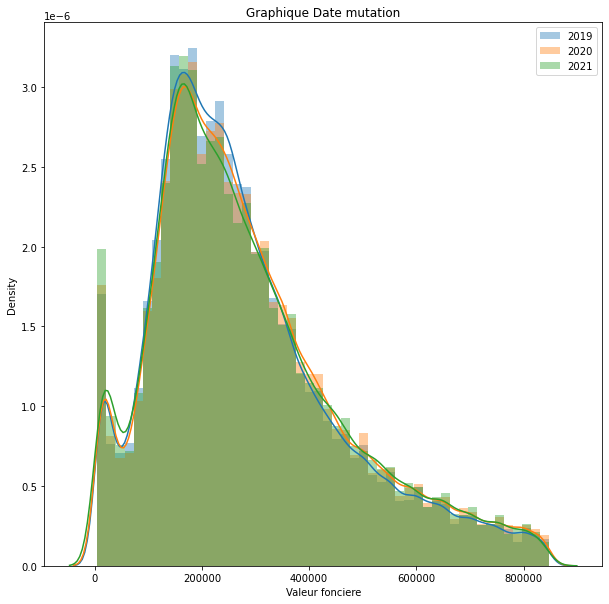

In [98]:
GraphiqueRelations('Date mutation',[2019,2020,2021],False,10)

#### 4. Faire 2 dataFrames 2019 et 2020/2021 : en france covid est arrivée debut 2020

In [99]:
Data19=DataFin[DataFin['Date mutation']==2019]
Data2021=DataFin[DataFin['Date mutation']>=2020]

#### 5. Statistiques
* -Voir si moins de ventes en 2020 que 2019 car on peut comparer sur une année entiere
* -Stats Année par Année pour les stats de moyenne et tout. 

In [100]:
#nombre de ventes
print('Nombres de ventes en 2017: %d' %len(Data[Data['Date mutation']==2017].index))
print('Nombres de ventes en 2018: %d' %len(Data[Data['Date mutation']==2018].index))
print('Nombres de ventes en 2019: %d' %len(Data19.index))
print('Nombres de ventes en 2020: %d' %len(Data2021[Data2021['Date mutation']==2020].index))

Nombres de ventes en 2017: 277286
Nombres de ventes en 2018: 280105
Nombres de ventes en 2019: 284948
Nombres de ventes en 2020: 243674


In [101]:
#stats 2019 / 2020-2021(Covid)
Data19.describe()

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
count,284948.00,284948.00,284948.00,284948.00,284948.00,284948.00,284948.00,284948.00,284948.00,284948.00
mean,2019.00,3.06,281745.43,684.64,2.51,44.16,1.88,307.30,15.75,0.92
std,0.00,0.37,174225.39,368.06,1.21,47.43,1.89,2149.72,3.44,0.84
min,2019.00,0.00,5001.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2019.00,3.00,159000.00,351.00,2.00,0.00,0.00,0.00,16.00,0.00
50%,2019.00,3.00,245000.00,747.00,2.00,39.00,2.00,0.00,16.00,1.00
75%,2019.00,3.00,367100.00,937.00,3.00,70.00,3.00,189.00,18.00,1.00
max,2019.00,5.00,847410.00,1312.00,5.00,500.00,9.00,100000.00,21.00,7.00


In [102]:
Data2021.describe()

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Nature culture,Nombre de lots
count,363108.00,363108.00,363108.00,363108.00,363108.00,363108.00,363108.00,363108.00,363108.00,363108.00
mean,2020.33,3.01,289019.83,692.22,2.54,43.55,1.86,361.51,15.69,0.89
std,0.47,0.24,178992.43,365.20,1.26,48.42,1.92,2448.56,3.69,0.86
min,2020.00,0.00,5000.45,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2020.00,3.00,160000.00,373.00,2.00,0.00,0.00,0.00,16.00,0.00
50%,2020.00,3.00,250000.00,753.00,2.00,36.00,2.00,0.00,16.00,1.00
75%,2021.00,3.00,381591.75,944.00,3.00,70.00,3.00,240.00,18.00,1.00
max,2021.00,5.00,847478.00,1312.00,5.00,500.00,9.00,100000.00,21.00,7.00


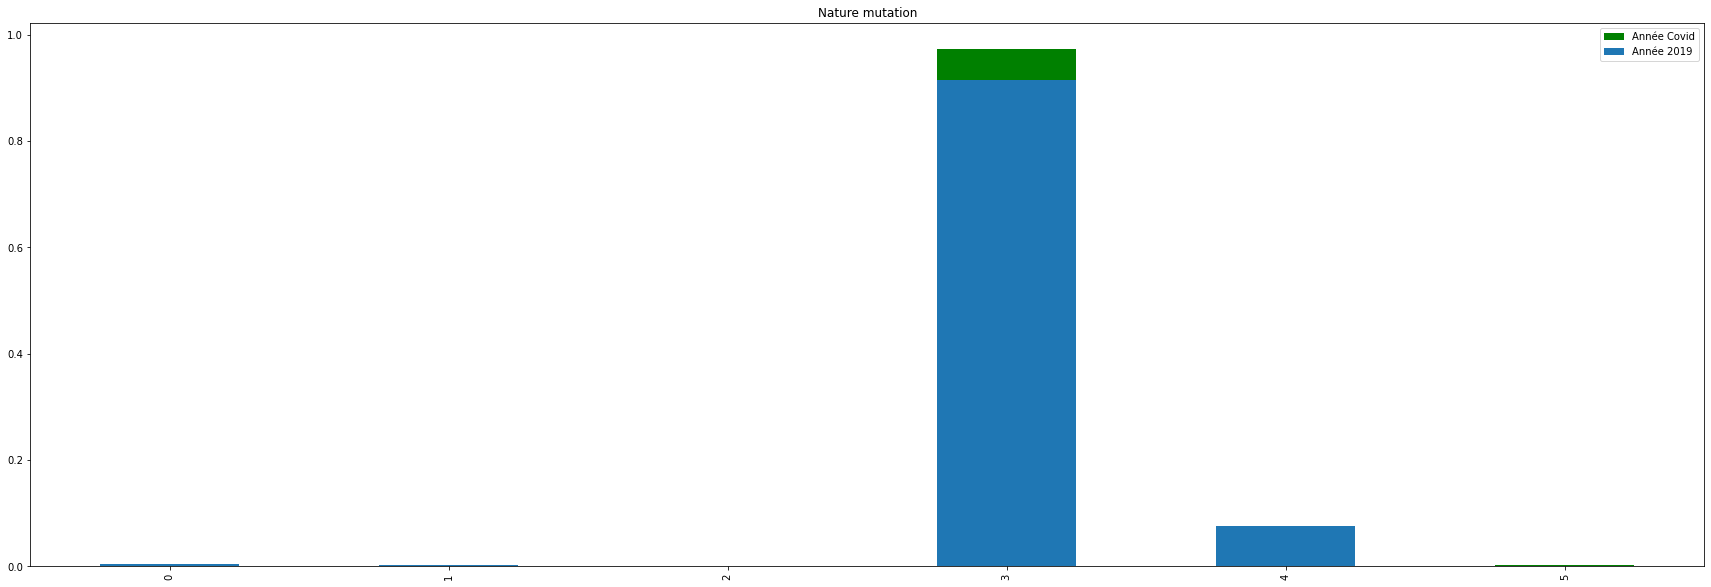

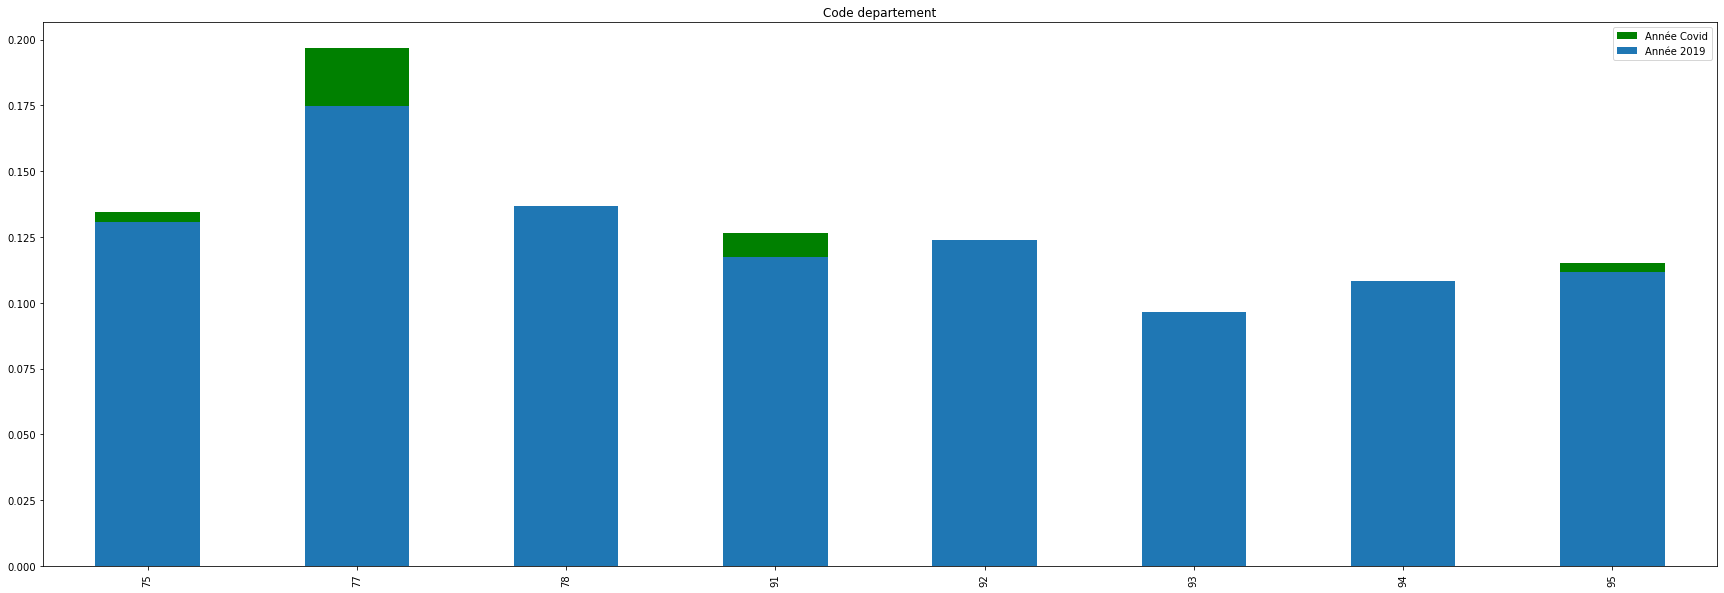

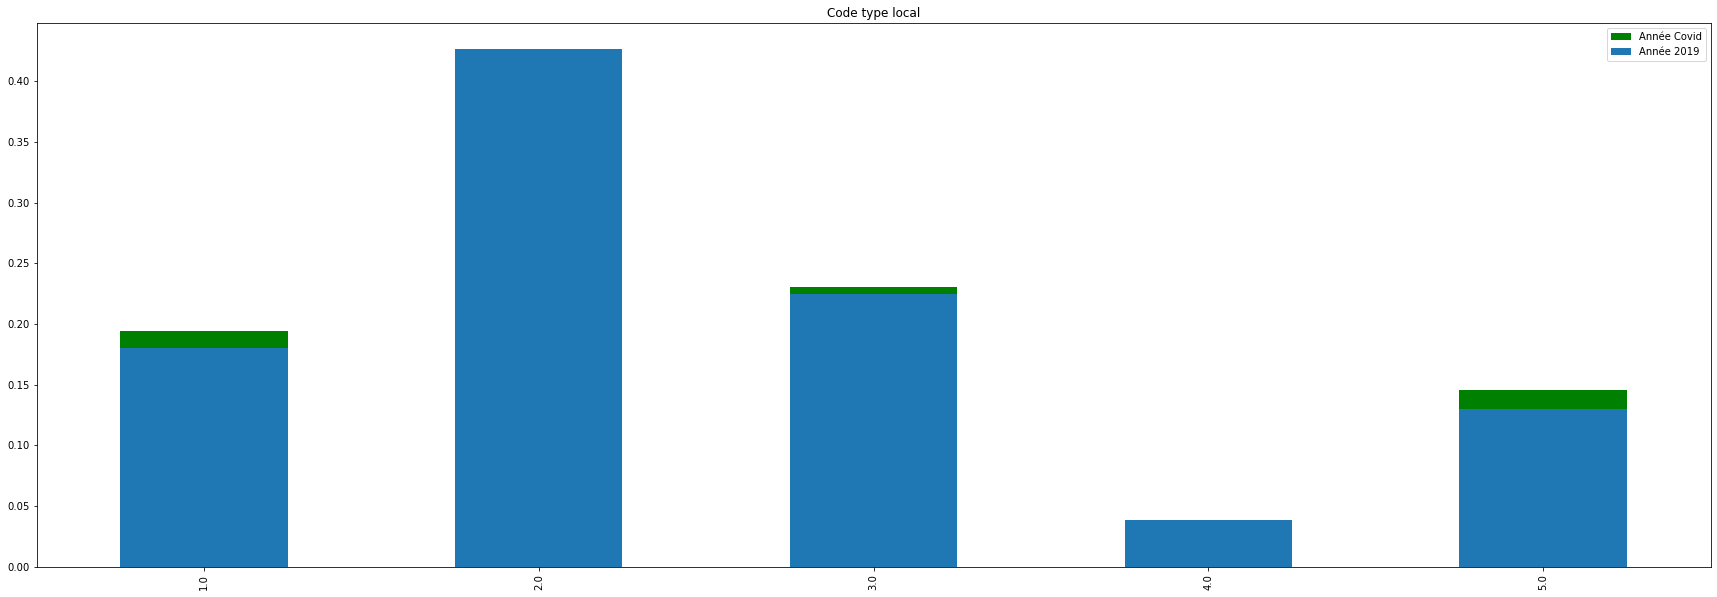

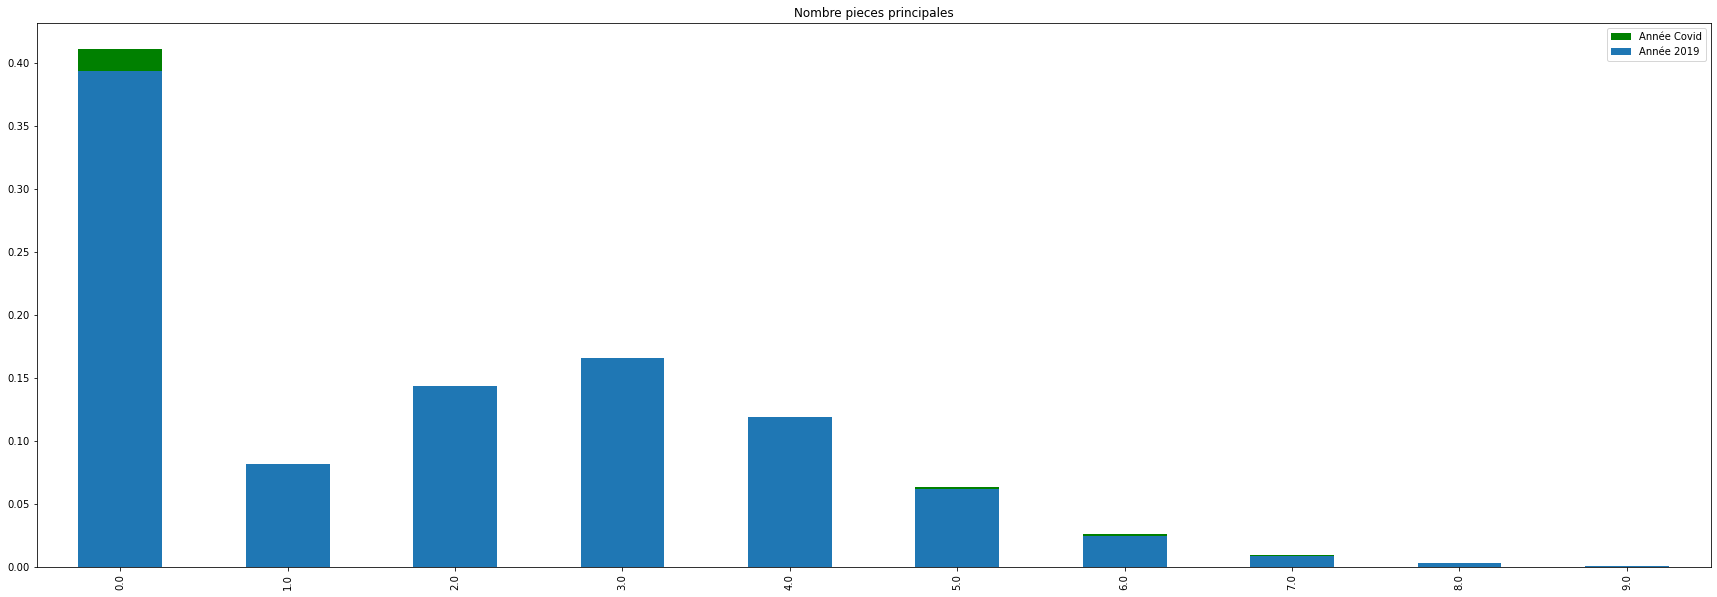

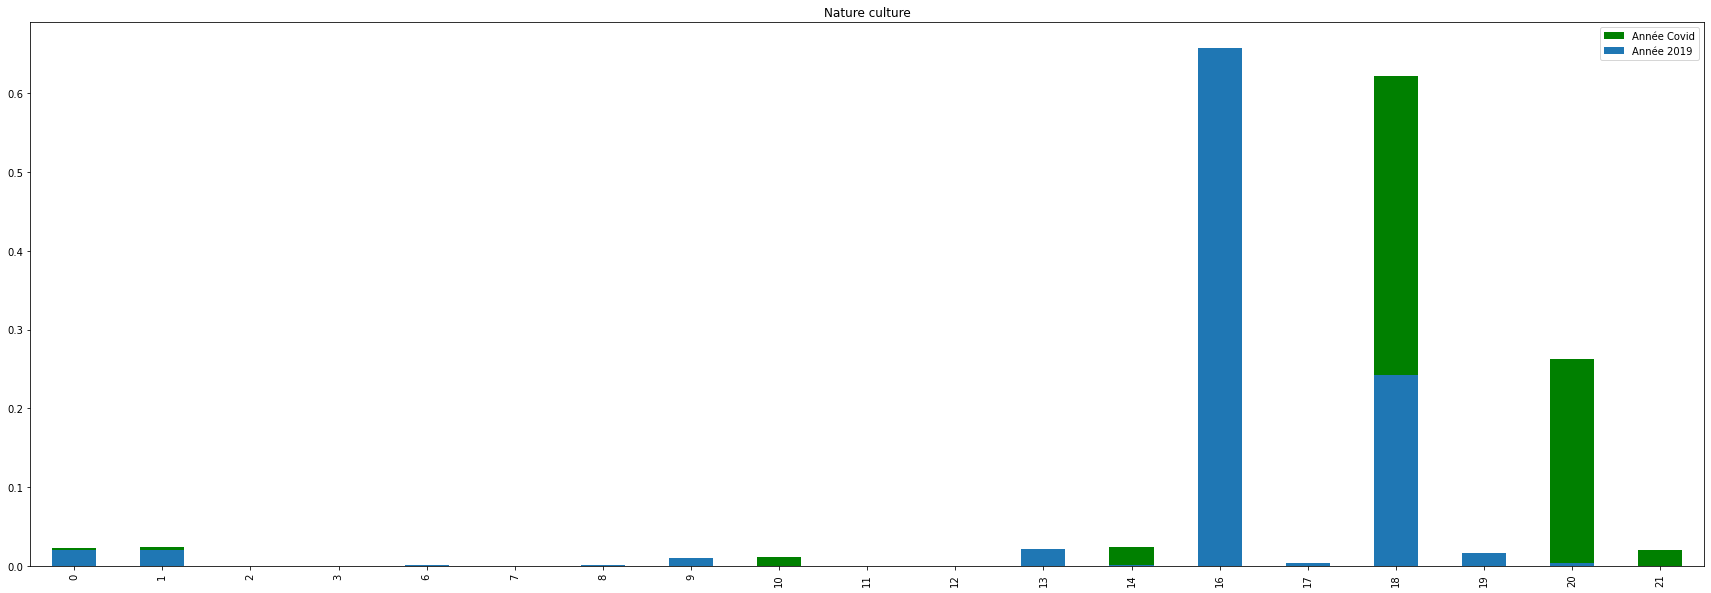

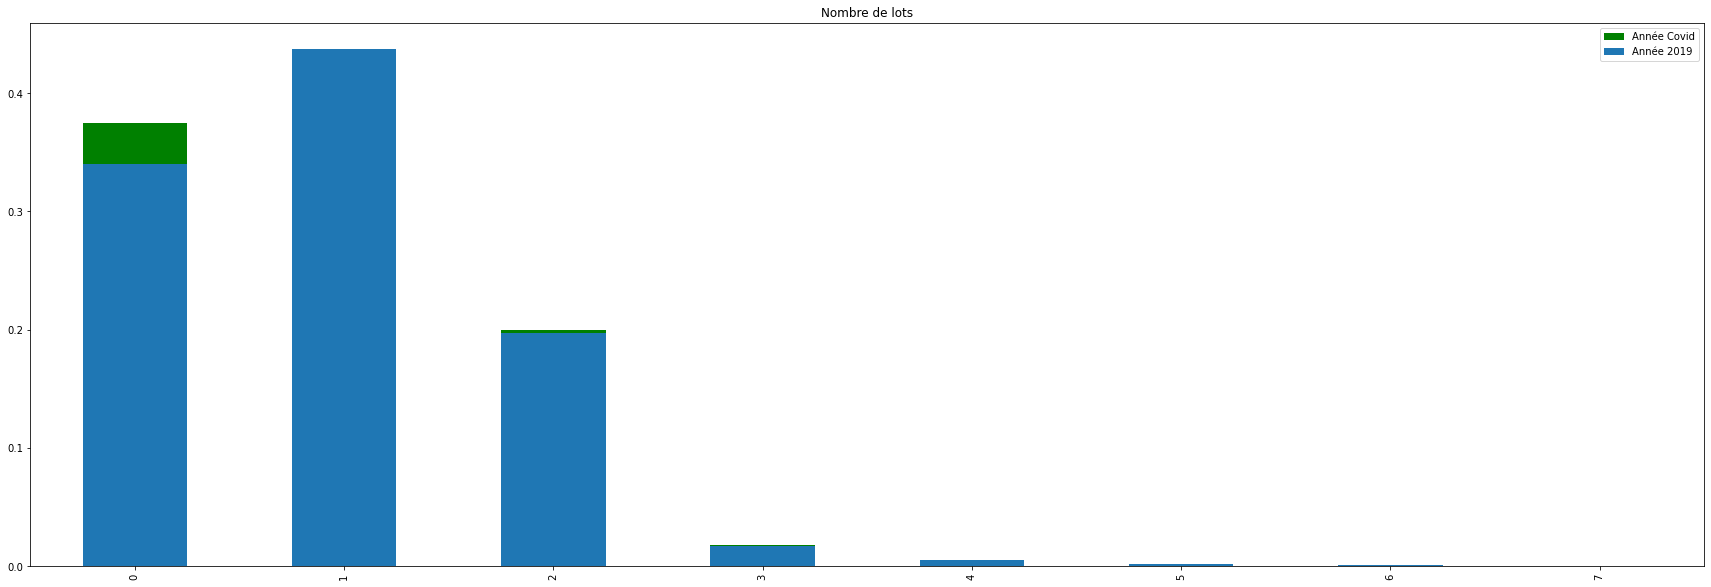

In [103]:
pd.set_option('display.max_columns', None)

#on stoccke dans une liste les variables que nous allons étudier
lst=['Nature mutation','Code departement','Code type local','Nombre pieces principales','Nature culture','Nombre de lots']

for col in lst:
        plt.figure(figsize=(30,10))
        plt.title(col)
        (Data2021[col].value_counts()/Data2021[col].count()).sort_index().plot.bar(x='Targe',y='hfh',color='g')
        (Data19[col].value_counts()/Data19[col].count()).sort_index().plot.bar(x='Targe',y='hfh')
        plt.legend(["Année Covid","Année 2019"])
        plt.title(col)
